<a href="https://colab.research.google.com/github/fitrasaphira/DataCo-Supply-Chain/blob/main/GFP_Group_M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataCO SMART Supply Chain Analysis**


**Group Final Project by :**
> **Group M**
- Achmad Aziz Fachrul Rozi
- Fitra Rachma Saphira
- GM Surya Widya Sabda

##**Content**

- Objective
- Data Dictionary
- Data Cleaning and Preparation
- Exploratory Data Analysis

## **Data Overview**

The dataset is belongs to an international e-commerce supply chain called DataCo. It contains records of their products sold, financial details, shipping records, and customer information such as sales, demographics, and transaction details. The data is 96 MB in size and contains information for up to 180,000 rows and 53 columns.

Link of the data is provided in this [Kaggle dataset link](https://www.kaggle.com/shashwatwork/dataco-smart-supply-chain-for-big-data-analysis)

## **Business Problem & Questions** 

**Business Problem** : In the last two years, 54.5% of the orders have 
encountered late delivery.

**Objective** : How can we reduce the percentage of order that encoutered late delivery using effective and thoughtful strategy?

**Business Questions** :
1. How long does it take for shipment (fastest, normal, slowest) in each region and states?
2. What month and year in the last two years with highest amount of shipping delay & late delivery?
3. Which country has the highest and least percentage of late delivery & shipping delay?
4. Which region with highest and least percentage of late delivery & shipping delay?
5. Which departement store with highest and least percentage of late delivery & shipping delay?
6. Which customer segment with highest and least percentage of late delivery?
7. Top 10 order's category with high amount of late risk order
8. Top 10 location with high amount of late risk order
9. What correlation does order's region & product category have towards late delivery?
10. What correlation does shipping mode and shipping days have towards late delivery?
11. What correlation does late delivery have towards profit?? 














## **Scope** 
- Research is limited to e-commerce data for the last two year (2017-2018)
- All external factors are assumed to have no influence


## **Data Dictionary** 


- Type :  Type of transaction made
- Days for shipping (real) : Actual shipping days of the purchased product
- Days for shipment (scheduled): Days of scheduled delivery of the purchased product
- Benefit per order : Earnings per order placed
- Sales per customer : Total sales per customer made per customer
- Delivery Status : Delivery status of orders: Advance shipping,  Late delivery,  Shipping canceled,  Shipping on time
- Late_delivery_risk :  Categorical variable that indicates if sending is late (1) it is not late (0).
- Category Id :  Product category code
- Category Name :  Description of the product category
- Customer City:  City where the customer made the purchase
- Customer Country:  Country where the customer made the purchase
- Customer Email:  Customer's email
- Customer Fname:  Customer name
- Customer Id:  Customer ID
- Customer Lname:  Customer lastname
- Customer Password:  Masked customer key
- Customer Segment:  Types of Customers: Consumer  Corporate  Home Office
- Customer State:  State to which the store where the purchase is registered belongs
- Customer Street:  Street to which the store where the purchase is registered belongs
- Customer Zipcode:  Customer Zipcode
- Department Id:  Department code of store
- Department Name:  Department name of store
- Latitude:  Latitude corresponding to location of store
- Longitude:  Longitude corresponding to location of store
- Market:  Market to where the order is delivered : Africa  Europe  LATAM  Pacific Asia  USCA
- Order City:  Destination city of the order
- Order Country:  Destination country of the order
- Order Customer Id:  Customer order code
- Order date (DateOrders):  Date on which the order is made
- Order Id:  Order code
- Order Item Cardprod Id:  Product code generated through the RFID reader
- Order Item Discount:  Order item discount value
- Order Item Discount Rate     :  Order item discount percentage
- Order Item Id:  Order item code
- Order Item Product Price     :  Price of products without discount
- Order Item Profit Ratio:  Order Item Profit Ratio
- Order Item Quantity:  Number of products per order
- Sales:  Value in sales
- Order Item Total  :  Total amount per order
- Order Profit Per Order:  Order Profit Per Order
- Order Region:  Region of the world where the order is delivered : Southeast Asia South Asia Oceania Eastern Asia West Asia  West of USA  US Center  West Africa Central Africa North Africa Western Europe Northern  Caribbean  South America East Africa Southern Europe  East of USA Canada Southern Africa  Central Asia   Europe  Central America Eastern Europe  South of  USA
- Order State:  State of the region where the order is delivered
- Order Status:  COMPLETE  PENDING  CLOSED  PENDING_PAYMENT CANCELED  PROCESSING SUSPECTED_FRAUD ON_HOLD PAYMENT_REVIEW
- Product Card Id:  Product code
- Product Category Id:  Product category code
- Product Description:  Product Description
- Product Image:  Link of visit and purchase of the product
- Product Name:  Product Name
- Product Price:  Product Price
- Product Status:  Status of the product stock :If it is 1 not available  0 the product is available
- Shipping date (DateOrders)   :  Exact date and time of shipment
- Shipping Mode:  The following shipping modes are presented : Standard - Class  First Class  Second Class  Same Day


# **Import Libary and Datasets**

**Code Preparation**

In [ ]:
! pip install skimpy


#for data manipulation
import pandas as pd
from skimpy import clean_columns #clean columns header

#for date manipulation
from datetime import datetime
from datetime import timedelta
from datetime import date

#for liniear algebra
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 5.1 MB/s 
     |████████████████████████████████| 214 kB 58.3 MB/s 
     |████████████████████████████████| 51 kB 8.4 MB/s 
  Attempting uninstall: Pygments
    Found existing installation: Pygments 2.6.1
    Uninstalling Pygments-2.6.1:
      Successfully uninstalled Pygments-2.6.1
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.7.1
    Uninstalling typeguard-2.7.1:
      Successfully uninstalled typeguard-2.7.1


Dataset already been processed in Bigquery, then the csv output is converted to xslx and uploaded to [Google Drive](https://docs.google.com/spreadsheets/d/1PqFTQxTB5cAfzUOscPiRMp4HwkDIhqiK/edit#gid=62775222). Now lets import it here

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1PqFTQxTB5cAfzUOscPiRMp4HwkDIhqiK/edit#gid=62775222'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
main_df = pd.read_csv(sheet_url_trf)
main_df

Days_for_shipping__real_  Days_for_shipment__scheduled_  \
0                             3                              2   
1                             4                              2   
2                             6                              2   
3                             4                              2   
4                             6                              2   
...                         ...                            ...   
55314                         4                              2   
55315                         6                              4   
55316                         0                              0   
55317                         6                              4   
55318                         5                              4   

         Delivery_Status  Late_delivery_risk  Category_Id      Category_Name  \
0          Late delivery                   1           67               DVDs   
1          Late delivery                   1           67               DVDs   
2          Late delivery                   1           67               DVDs   
3          Late delivery                   1           67               DVDs   
4          Late delivery                   1           67               DVDs   
...                  ...                 ...          ...                ...   
55314  Shipping canceled                   0           10  Strength Training   
55315  Shipping canceled                   0           10  Strength Training   
55316  Shipping canceled                   0           26     Girls' Apparel   
55317  Shipping canceled                   0           26     Girls' Apparel   
55318  Shipping canceled                   0           26     Girls' Apparel   

       Customer_City Customer_Country  Customer_Id Customer_Segment  ...  \
0             Caguas      Puerto Rico        15070         Consumer  ...   
1             Caguas      Puerto Rico        15086         Consumer  ...   
2             Caguas      Puerto Rico        15068         Consumer  ...   
3             Caguas      Puerto Rico        15026         Consumer  ...   
4             Caguas      Puerto Rico        15003         Consumer  ...   
...              ...              ...          ...              ...  ...   
55314         Caguas      Puerto Rico         1231         Consumer  ...   
55315         Caguas      Puerto Rico         9860         Consumer  ...   
55316          Bronx          EE. UU.         1024         Consumer  ...   
55317        Houston          EE. UU.         5233         Consumer  ...   
55318  Granada Hills          EE. UU.         6795         Consumer  ...   

        Shipping_Mode  order_date  shipping_date  benefit_per_order  \
0        Second Class   9/11/2017     12/11/2017              36.16   
1        Second Class  10/11/2017     14/11/2017            -410.79   
2        Second Class   9/11/2017     15/11/2017              32.22   
3        Second Class   9/11/2017     13/11/2017            -254.30   
4        Second Class   8/11/2017     14/11/2017              16.16   
...               ...         ...            ...                ...   
55314    Second Class    8/9/2017      12/9/2017              72.24   
55315  Standard Class   19/8/2017      25/8/2017              16.30   
55316        Same Day   20/4/2017      20/4/2017             105.45   
55317  Standard Class    4/4/2017      10/4/2017            -117.81   
55318  Standard Class   19/2/2017      24/2/2017              25.53   

      sales_per_customer  order_item_discount  order_item_discount_rate  \
0                 164.38                 0.00                      0.00   
1                 161.09                 3.29                      0.02   
2                 161.09                 3.29                      0.02   
3                 149.59                14.79                      0.09   
4                 138.08                26.30                      0.16   
...                  ...             

In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55319 entries, 0 to 55318
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Days_for_shipping__real_       55319 non-null  int64  
 1   Days_for_shipment__scheduled_  55319 non-null  int64  
 2   Delivery_Status                55319 non-null  object 
 3   Late_delivery_risk             55319 non-null  int64  
 4   Category_Id                    55319 non-null  int64  
 5   Category_Name                  55319 non-null  object 
 6   Customer_City                  55319 non-null  object 
 7   Customer_Country               55319 non-null  object 
 8   Customer_Id                    55319 non-null  int64  
 9   Customer_Segment               55319 non-null  object 
 10  Customer_State                 55319 non-null  object 
 11  Customer_Street                55319 non-null  object 
 12  Customer_Zipcode               55316 non-null 

In [ ]:
main_df.columns

Index(['Days_for_shipping__real_', 'Days_for_shipment__scheduled_',
       'Delivery_Status', 'Late_delivery_risk', 'Category_Id', 'Category_Name',
       'Customer_City', 'Customer_Country', 'Customer_Id', 'Customer_Segment',
       'Customer_State', 'Customer_Street', 'Customer_Zipcode',
       'Department_Id', 'Department_Name', 'Latitude', 'Longitude', 'Market',
       'Order_City', 'Order_Country', 'Order_Id', 'Order_Item_Cardprod_Id',
       'Order_Item_Id', 'Order_Item_Quantity', 'Order_Region', 'Order_State',
       'Order_Status', 'Product_Name', 'Shipping_Mode', 'order_date',
       'shipping_date', 'benefit_per_order', 'sales_per_customer',
       'order_item_discount', 'order_item_discount_rate',
       'order_item_product_price', 'order_item_profit_ratio', 'sales'],
      dtype='object')

**Clean the name of all variable**

In [ ]:
main_df = clean_columns(main_df)
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55319 entries, 0 to 55318
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   days_for_shipping_real       55319 non-null  int64  
 1   days_for_shipment_scheduled  55319 non-null  int64  
 2   delivery_status              55319 non-null  object 
 3   late_delivery_risk           55319 non-null  int64  
 4   category_id                  55319 non-null  int64  
 5   category_name                55319 non-null  object 
 6   customer_city                55319 non-null  object 
 7   customer_country             55319 non-null  object 
 8   customer_id                  55319 non-null  int64  
 9   customer_segment             55319 non-null  object 
 10  customer_state               55319 non-null  object 
 11  customer_street              55319 non-null  object 
 12  customer_zipcode             55316 non-null  float64
 13  department_id   

**Duplicate data frame for safety reasons**

In [ ]:
df = main_df.copy()

# **Data Cleaning and Preparation**
In this section will be cleaned by several steps
1. Removing irrelevant values
2. Handling missing values
3. Removing duplicate values
4. Handling outliers
5. Converting data types
  * string: if there are typos or abnormal string data, it needs fo be transformed
  * timeseries: fime series column is read as time series (not string)
6. Combine the dataset info single dataset

##**Cleaning on BigQuery**


> **Dataset through cleaning in bigquery first for:**
*   sampling (timeframe 2017-2018)
*   dropping irrelevant columns
*   removing columns that have blank and same value in entire row
*   rounding numbers and date formatting

Link of saved BiqQuery Syntax is [here](https://console.cloud.google.com/bigquery?sq=996301094706:2fca0196cfd544fba4389779f807ed9e).






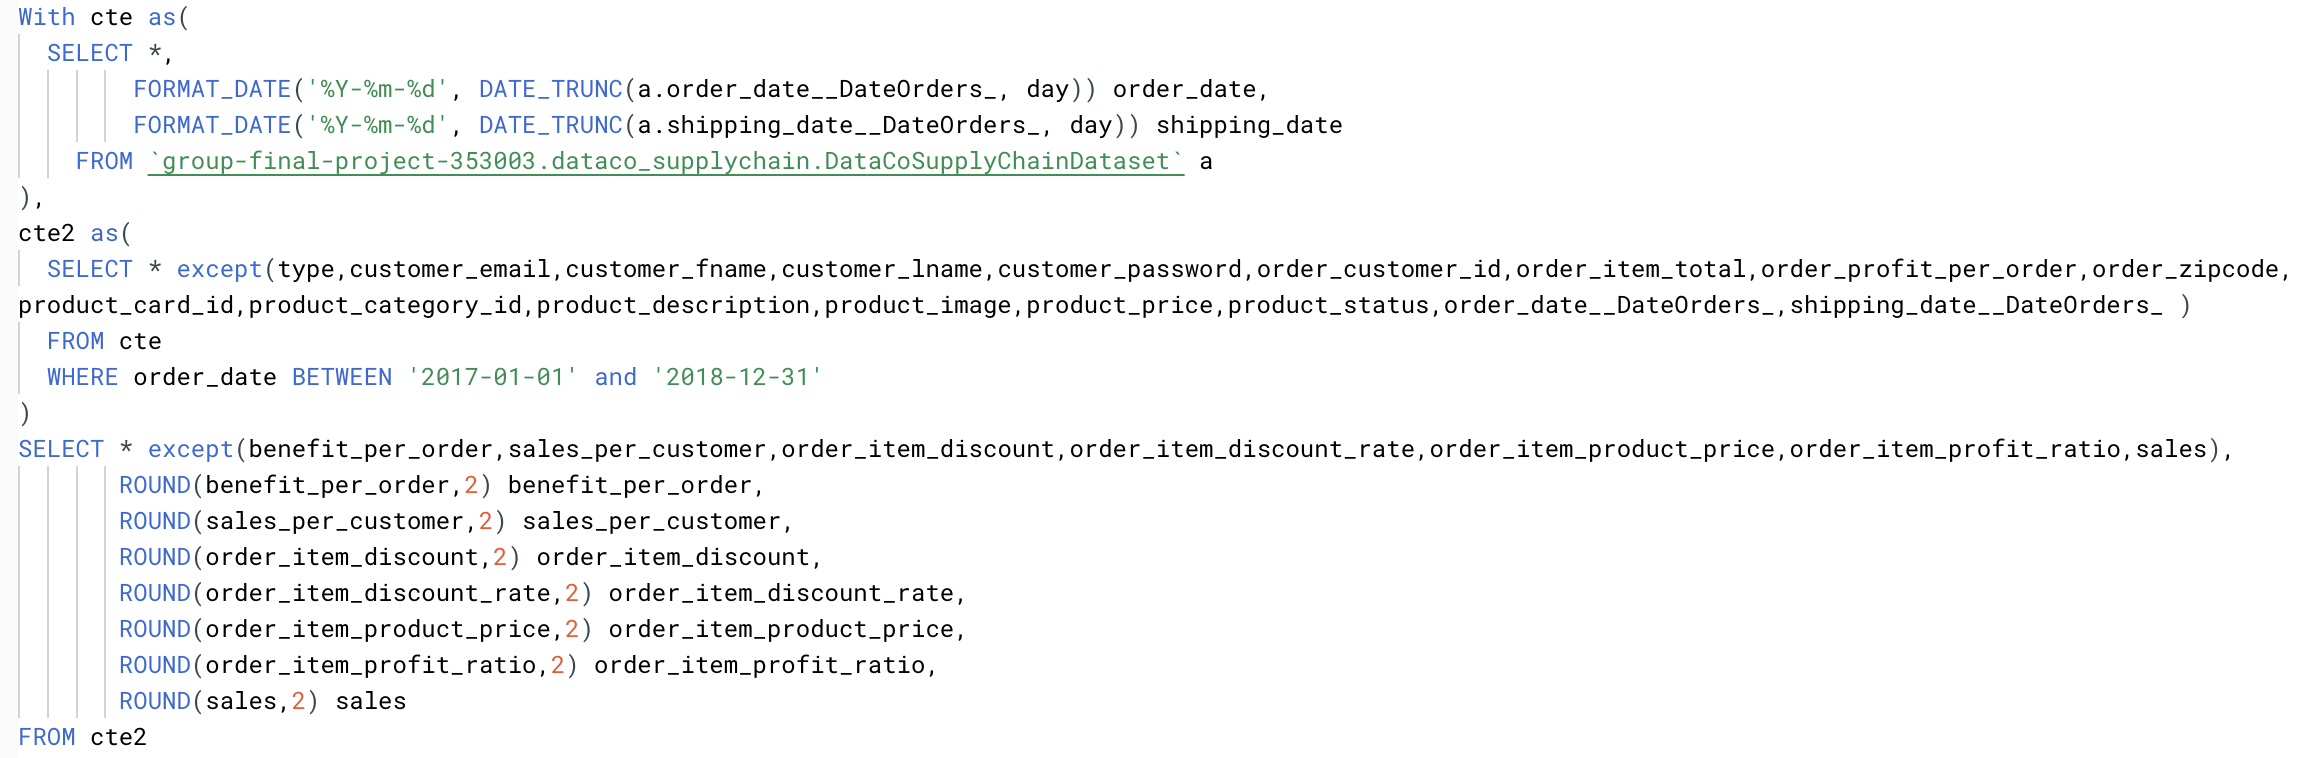

## **Removing Irrelevant Values**

First lets check the correlation matrix first, in our case we use excel to see it

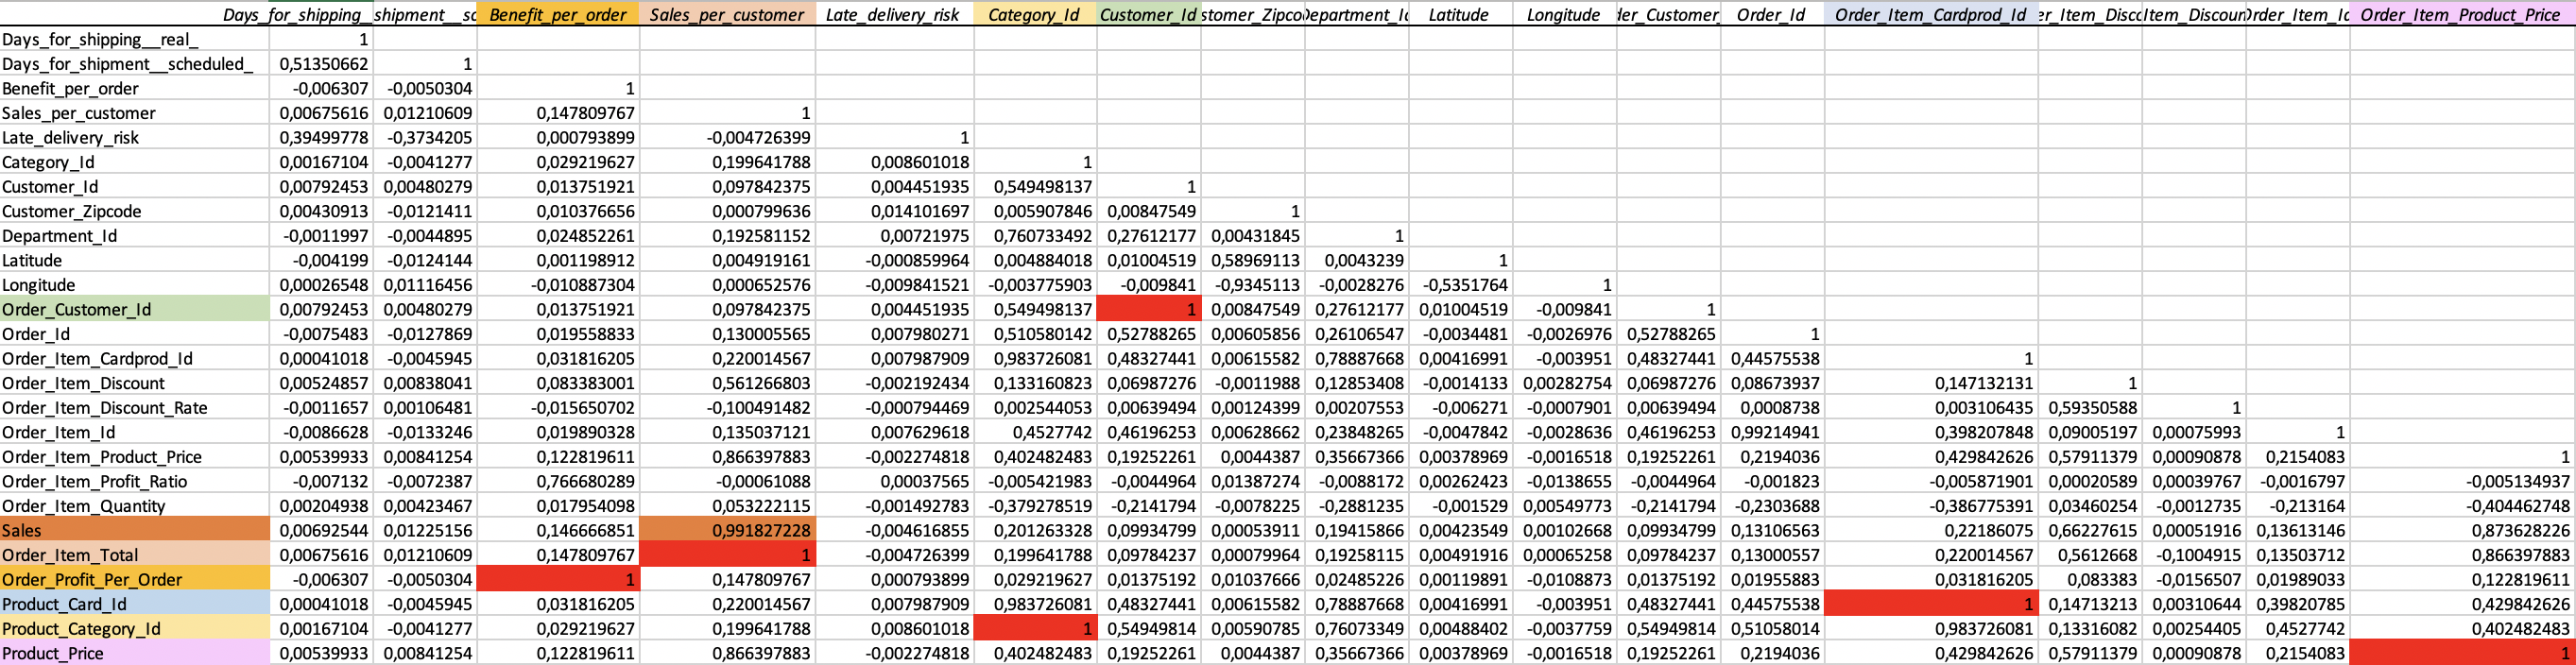

There are many duplicate columns in the dataset after observing the correlation in Excel. **The duplicate column** is then removed using bigquery. The columns are as follows:

1.	order_customer_id
2.	order_item_total
3.	order_profit_per_order
4.	product_card_id
5.	product_category_id
6.	product_price


**The columns that are not important or have blank and same value** in entire row are also removed :

1.	type
2.	customer_email
3.	customer_fname
4.	customer_lname
5.	customer_password
6.	order_zipcode
7.	product_description
8.	product_image
9.	product_status

In [ ]:
df.head()

days_for_shipping_real  days_for_shipment_scheduled delivery_status  \
0                       3                            2   Late delivery   
1                       4                            2   Late delivery   
2                       6                            2   Late delivery   
3                       4                            2   Late delivery   
4                       6                            2   Late delivery   

   late_delivery_risk  category_id category_name customer_city  \
0                   1           67          DVDs        Caguas   
1                   1           67          DVDs        Caguas   
2                   1           67          DVDs        Caguas   
3                   1           67          DVDs        Caguas   
4                   1           67          DVDs        Caguas   

  customer_country  customer_id customer_segment  ... shipping_mode  \
0      Puerto Rico        15070         Consumer  ...  Second Class   
1      Puerto Rico        15086         Consumer  ...  Second Class   
2      Puerto Rico        15068         Consumer  ...  Second Class   
3      Puerto Rico        15026         Consumer  ...  Second Class   
4      Puerto Rico        15003         Consumer  ...  Second Class   

   order_date  shipping_date  benefit_per_order sales_per_customer  \
0   9/11/2017     12/11/2017              36.16             164.38   
1  10/11/2017     14/11/2017            -410.79             161.09   
2   9/11/2017     15/11/2017              32.22             161.09   
3   9/11/2017     13/11/2017            -254.30             149.59   
4   8/11/2017     14/11/2017              16.16             138.08   

   order_item_discount  order_item_discount_rate order_item_product_price  \
0                 0.00                      0.00                   164.38   
1                 3.29                      0.02                   164.38   
2                 3.29                      0.02                   164.38   
3                14.79                      0.09                   164.38   
4                26.30                      0.16                   164.38   

  order_item_profit_ratio   sales  
0                    0.22  164.38  
1                   -2.55  164.38  
2                    0.20  164.38  
3                   -1.70  164.38  
4                    0.12  164.38  

[5 rows x 38 columns]

**Checking the correlation again**

In [ ]:
numerical_column = df[['days_for_shipping_real','days_for_shipment_scheduled', 'late_delivery_risk','latitude', 'longitude','order_item_quantity','benefit_per_order','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio','sales','sales_per_customer']]
numerical_column

days_for_shipping_real  days_for_shipment_scheduled  \
0                           3                            2   
1                           4                            2   
2                           6                            2   
3                           4                            2   
4                           6                            2   
...                       ...                          ...   
55314                       4                            2   
55315                       6                            4   
55316                       0                            0   
55317                       6                            4   
55318                       5                            4   

       late_delivery_risk   latitude   longitude  order_item_quantity  \
0                       1  18.269650  -66.037064                    1   
1                       1  18.232819  -66.037056                    1   
2                       1  18.249033  -66.037064                    1   
3                       1  18.253429  -66.037056                    1   
4                       1  18.236521  -66.037064                    1   
...                   ...        ...         ...                  ...   
55314                   0  18.200916  -66.370522                    1   
55315                   0  18.278393  -66.370560                    1   
55316                   0  40.903412  -73.854942                    5   
55317                   0  29.712902  -95.487190                    1   
55318                   0  33.727760 -117.809288                    2   

       benefit_per_order  order_item_discount  order_item_discount_rate  \
0                  36.16                 0.00                      0.00   
1                -410.79                 3.29                      0.02   
2                  32.22                 3.29                      0.02   
3                -254.30                14.79                      0.09   
4                  16.16                26.30                      0.16   
...                  ...                  ...                       ...   
55314              72.24                17.01                      0.09   
55315              16.30                 3.78                      0.02   
55316             105.45                59.50                      0.17   
55317            -117.81                 0.70                      0.01   
55318              25.53                 4.20                      0.03   

       order_item_product_price  order_item_profit_ratio   sales  \
0                        164.38                     0.22  164.38   
1                        164.38                    -2.55  164.38   
2                        164.38                     0.20  164.38   
3                        164.38                    -1.70  164.38   
4                        164.38                     0.12  164.38   
...                         ...                      ...     ...   
55314                    189.00                     0.42  189.00   
55315                    189.00                     0.09  189.00   
55316                     70.00                     0.36  350.00   
55317                     70.00                    -1.70   70.00   
55318                     70.00                     0.19  140.00   

       sales_per_customer  
0                  164.38  
1                  161.09  
2                  161.09  
3                  149.59  
4                  138.08  
...                   ...  
55314              171.99  
55315              185.22  
55316              290.50  
55317               69.30  
55318              135.80  

[55319 rows x 13 columns]

In [ ]:
numerical_column.corr()

days_for_shipping_real  \
days_for_shipping_real                     1.000000   
days_for_shipment_scheduled                0.513507   
late_delivery_risk                         0.394998   
latitude                                  -0.004199   
longitude                                  0.000265   
order_item_quantity                        0.002049   
benefit_per_order                         -0.006307   
order_item_discount                        0.005249   
order_item_discount_rate                  -0.001166   
order_item_product_price                   0.005399   
order_item_profit_ratio                   -0.007132   
sales                                      0.006925   
sales_per_customer                         0.006756   

                             days_for_shipment_scheduled  late_delivery_risk  \
days_for_shipping_real                          0.513507            0.394998   
days_for_shipment_scheduled                     1.000000           -0.373421   
late_delivery_risk                             -0.373421            1.000000   
latitude                                       -0.012414           -0.000860   
longitude                                       0.011165           -0.009842   
order_item_quantity                             0.004235           -0.001493   
benefit_per_order                              -0.005030            0.000794   
order_item_discount                             0.008380           -0.002192   
order_item_discount_rate                        0.001065           -0.000794   
order_item_product_price                        0.008413           -0.002275   
order_item_profit_ratio                        -0.007239            0.000376   
sales                                           0.012252           -0.004617   
sales_per_customer                              0.012106           -0.004726   

                             latitude  longitude  order_item_quantity  \
days_for_shipping_real      -0.004199   0.000265             0.002049   
days_for_shipment_scheduled -0.012414   0.011165             0.004235   
late_delivery_risk          -0.000860  -0.009842            -0.001493   
latitude                     1.000000  -0.535176            -0.001529   
longitude                   -0.535176   1.000000             0.005498   
order_item_quantity         -0.001529   0.005498             1.000000   
benefit_per_order            0.001199  -0.010887             0.017954   
order_item_discount         -0.001413   0.002828             0.034603   
order_item_discount_rate    -0.006271  -0.000790            -0.001273   
order_item_product_price     0.003790  -0.001652            -0.404463   
order_item_profit_ratio      0.002624  -0.013865             0.009423   
sales                        0.004235   0.001027             0.053516   
sales_per_customer           0.004919   0.000653             0.053222   

                             benefit_per_order  order_item_discount  \
days_for_shipping_real               -0.006307             0.005249   
days_for_shipment_scheduled          -0.005030             0.008380   
late_delivery_risk                    0.000794            -0.002192   
latitude                              0.001199            -0.001413   
longitude                            -0.010887             0.002828   
order_item_quantity                   0.017954             0.034603   
benefit_per_order                     1.000000             0.083383   
order_item_discount                   0.083383             1.000000   
order_item_discount_rate             -0.015651             0.593506   
order_item_product_price              0.122820             0.579114   
order_item_profit_ratio               0.766680             0.000206   
sales                                 0.146667             0.662276   
sales_per_customer                    0.147810             0.561267   

                             order_item_discount_rate  \
days_for_shipping_real                      -0.001166   
days_

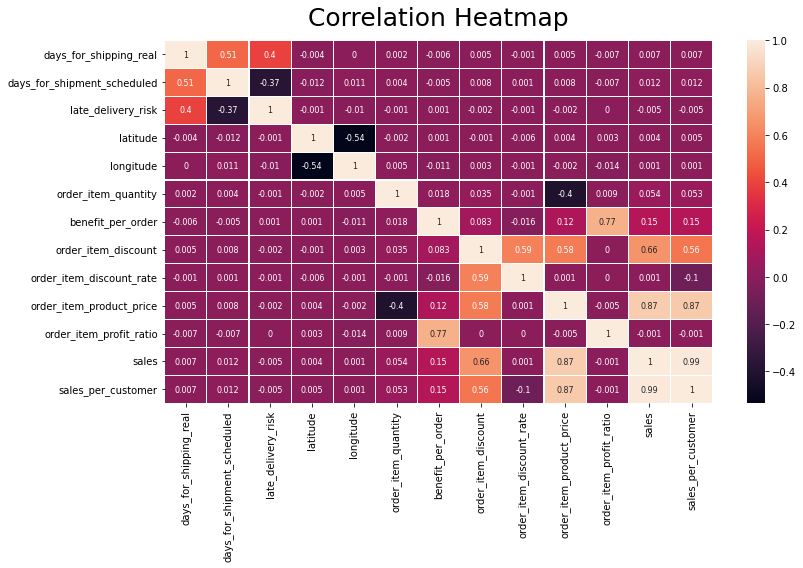

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(numerical_column.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

Apparently **sales** column have a high correlation (almost 1) with **sales_per_customer**>> lets just delete it

In [ ]:
df.drop(columns=['sales'],inplace=True)
df

days_for_shipping_real  days_for_shipment_scheduled    delivery_status  \
0                           3                            2      Late delivery   
1                           4                            2      Late delivery   
2                           6                            2      Late delivery   
3                           4                            2      Late delivery   
4                           6                            2      Late delivery   
...                       ...                          ...                ...   
55314                       4                            2  Shipping canceled   
55315                       6                            4  Shipping canceled   
55316                       0                            0  Shipping canceled   
55317                       6                            4  Shipping canceled   
55318                       5                            4  Shipping canceled   

       late_delivery_risk  category_id      category_name  customer_city  \
0                       1           67               DVDs         Caguas   
1                       1           67               DVDs         Caguas   
2                       1           67               DVDs         Caguas   
3                       1           67               DVDs         Caguas   
4                       1           67               DVDs         Caguas   
...                   ...          ...                ...            ...   
55314                   0           10  Strength Training         Caguas   
55315                   0           10  Strength Training         Caguas   
55316                   0           26     Girls' Apparel          Bronx   
55317                   0           26     Girls' Apparel        Houston   
55318                   0           26     Girls' Apparel  Granada Hills   

      customer_country  customer_id customer_segment  ...  \
0          Puerto Rico        15070         Consumer  ...   
1          Puerto Rico        15086         Consumer  ...   
2          Puerto Rico        15068         Consumer  ...   
3          Puerto Rico        15026         Consumer  ...   
4          Puerto Rico        15003         Consumer  ...   
...                ...          ...              ...  ...   
55314      Puerto Rico         1231         Consumer  ...   
55315      Puerto Rico         9860         Consumer  ...   
55316          EE. UU.         1024         Consumer  ...   
55317          EE. UU.         5233         Consumer  ...   
55318          EE. UU.         6795         Consumer  ...   

                                        product_name   shipping_mode  \
0                                              DVDs     Second Class   
1                                              DVDs     Second Class   
2                                              DVDs     Second Class   
3                                              DVDs     Second Class   
4                                              DVDs     Second Class   
...                                              ...             ...   
55314  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack    Second Class   
55315  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack  Standard Class   
55316  adidas Youth Germany Black/Red Away Match Soc        Same Day   
55317  adidas Youth Germany Black/Red Away Match Soc  Standard Class   
55318  adidas Youth Germany Black/Red Away Match Soc  Standard Class   

       order_date  shipping_date benefit_per_order  sales_per_customer  \
0       9/11/2017     12/11/2017             36.16              164.38   
1      10/11/2017     14/11/2017           -410.79              161.09   
2       9/11/2017     15/11/2017             32.22              161.09   
3       9/11/2017     13/11/2017           -254.30              149.59   
4       8/11/2017     14/11/2017             16.16              138.08   
...           ...            ...               ...                 ...   
55314

**Checking the unique value**

In [ ]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

2    17245
4     8879
3     8753
6     8748
5     8679
1     1602
0     1413
Name: days_for_shipping_real, dtype: int64 

4    33154
2    10801
1     8349
0     3015
Name: days_for_shipment_scheduled, dtype: int64 

Late delivery        30159
Advance shipping     12796
Shipping on time      9930
Shipping canceled     2434
Name: delivery_status, dtype: int64 

1    30159
0    25160
Name: late_delivery_risk, dtype: int64 

17    6642
18    6126
24    5727
46    5226
45    4751
48    4321
43    3867
9     3371
29    2987
75     838
63     652
76     650
62     592
74     529
72     492
68     484
66     484
67     483
64     442
71     434
65     431
59     405
38     384
69     362
73     357
35     331
30     283
61     271
37     269
33     259
40     241
70     208
60     207
41     189
36     184
31     181
32     176
12     173
44     160
3      150
26     146
2      138
13     119
10     111
5      111
7       91
16      68
4       67
34      61
11      44
6       44
Name: category

Because **customer_country** only has 2 values (Puerto Rico & EE. UU) and may not have much meaning in the analysis so lets just remove it.

**Summary**
- There is order that not completed yet in the dataset
- The **customer_country** colum only has 2 values (Puerto Rico & EE. UU)
- There is 3 value of number in **customer_state**, the rest is string value >> this will be handled in the missing values section

In [ ]:
df['order_country'].unique()

array(['Francia', 'Irlanda', 'Alemania', 'Australia', 'Tailandia',
       'China', 'Malasia', 'Pakist√°n', 'Filipinas', 'Italia', 'Espa√±a',
       'Finlandia', 'Reino Unido', 'Jap√≥n', 'Indonesia', 'Austria',
       'Corea del Sur', 'India', 'B√©lgica', 'Vietnam', 'Pa√≠ses Bajos',
       'Pap√∫a Nueva Guinea', 'Camboya', 'Myanmar (Birmania)', 'Suecia',
       'Hong Kong', 'Laos', 'Banglad√©s', 'Singapur', 'Sri Lanka',
       'Nepal', 'Afganist√°n', 'Noruega', 'Suiza', 'Portugal', 'Grecia',
       'Dinamarca', 'Mongolia', 'Taiw√°n', 'But√°n', 'Brasil',
       'El Salvador', 'Bolivia', 'M√©xico', 'Guatemala',
       'Rep√∫blica Dominicana', 'Honduras', 'Cuba', 'Venezuela',
       'Panam√°', 'Argentina', 'Irak', 'Ir√°n', 'Nigeria', 'Argelia',
       'Turqu√≠a', 'Nicaragua', 'Kirguist√°n', 'Per√∫', 'Ecuador',
       'Chile', 'Jordania', 'Togo', 'Canada', 'Marruecos',
       'Arabia Saud√≠', 'Barbados', 'Ucrania', 'Bulgaria', 'Gab√≥n',
       'Colombia', 'Costa Rica', 'SudAfrica', 'Egipto'

In [ ]:
df['order_status'].value_counts()

COMPLETE           18074
PENDING_PAYMENT    12176
PROCESSING          6782
PENDING             6460
CLOSED              5916
ON_HOLD             2881
SUSPECTED_FRAUD     1301
CANCELED            1133
PAYMENT_REVIEW       596
Name: order_status, dtype: int64

In [ ]:
#cek_order= df['order_status'] = 'PENDING_PAYMENT'
df_orders = df.copy()
df_orders= df_orders[df_orders.order_status == 'PROCESSING']
df_orders['late_delivery_risk'].value_counts()

1    3859
0    2923
Name: late_delivery_risk, dtype: int64

In [ ]:
df.drop(columns=['customer_country'],inplace=True)
df

days_for_shipping_real  days_for_shipment_scheduled    delivery_status  \
0                           3                            2      Late delivery   
1                           4                            2      Late delivery   
2                           6                            2      Late delivery   
3                           4                            2      Late delivery   
4                           6                            2      Late delivery   
...                       ...                          ...                ...   
55314                       4                            2  Shipping canceled   
55315                       6                            4  Shipping canceled   
55316                       0                            0  Shipping canceled   
55317                       6                            4  Shipping canceled   
55318                       5                            4  Shipping canceled   

       late_delivery_risk  category_id      category_name  customer_city  \
0                       1           67               DVDs         Caguas   
1                       1           67               DVDs         Caguas   
2                       1           67               DVDs         Caguas   
3                       1           67               DVDs         Caguas   
4                       1           67               DVDs         Caguas   
...                   ...          ...                ...            ...   
55314                   0           10  Strength Training         Caguas   
55315                   0           10  Strength Training         Caguas   
55316                   0           26     Girls' Apparel          Bronx   
55317                   0           26     Girls' Apparel        Houston   
55318                   0           26     Girls' Apparel  Granada Hills   

       customer_id customer_segment customer_state  ...  \
0            15070         Consumer             PR  ...   
1            15086         Consumer             PR  ...   
2            15068         Consumer             PR  ...   
3            15026         Consumer             PR  ...   
4            15003         Consumer             PR  ...   
...            ...              ...            ...  ...   
55314         1231         Consumer             PR  ...   
55315         9860         Consumer             PR  ...   
55316         1024         Consumer             NY  ...   
55317         5233         Consumer             TX  ...   
55318         6795         Consumer             CA  ...   

                                        product_name   shipping_mode  \
0                                              DVDs     Second Class   
1                                              DVDs     Second Class   
2                                              DVDs     Second Class   
3                                              DVDs     Second Class   
4                                              DVDs     Second Class   
...                                              ...             ...   
55314  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack    Second Class   
55315  Yakima DoubleDown Ace Hitch Mount 4-Bike Rack  Standard Class   
55316  adidas Youth Germany Black/Red Away Match Soc        Same Day   
55317  adidas Youth Germany Black/Red Away Match Soc  Standard Class   
55318  adidas Youth Germany Black/Red Away Match Soc  Standard Class   

       order_date shipping_date  benefit_per_order  sales_per_customer  \
0       9/11/2017    12/11/2017              36.16              164.38   
1      10/11/2017    14/11/2017            -410.79              161.09   
2       9/11/2017    15/11/2017              32.22              161.09   
3       9/11/2017    13/11/2017            -254.30              149.59   
4       8/11/2017    14/11/2017              16.16              138.08   
...           ...           ...                ...                 ...   
55314    8/9/2017     12/9/20

## **Handling Missing Values**

**Checking the null value**

In [ ]:
df.isnull().sum()

days_for_shipping_real         0
days_for_shipment_scheduled    0
delivery_status                0
late_delivery_risk             0
category_id                    0
category_name                  0
customer_city                  0
customer_id                    0
customer_segment               0
customer_state                 0
customer_street                0
customer_zipcode               3
department_id                  0
department_name                0
latitude                       0
longitude                      0
market                         0
order_city                     0
order_country                  0
order_id                       0
order_item_cardprod_id         0
order_item_id                  0
order_item_quantity            0
order_region                   0
order_state                    0
order_status                   0
product_name                   0
shipping_mode                  0
order_date                     0
shipping_date                  0
benefit_pe

In [ ]:
df[df['customer_zipcode'].isnull()]


days_for_shipping_real  days_for_shipment_scheduled   delivery_status  \
7319                        2                            1     Late delivery   
44133                       4                            4  Shipping on time   
44237                       4                            4  Shipping on time   

       late_delivery_risk  category_id         category_name customer_city  \
7319                    1           65  Consumer Electronics            CA   
44133                   0           63   Children's Clothing            CA   
44237                   0           75           Video Games            CA   

       customer_id customer_segment customer_state  ...  \
7319         14577         Consumer          95758  ...   
44133        14046         Consumer          91732  ...   
44237        17171        Corporate          95758  ...   

                          product_name   shipping_mode  order_date  \
7319   Industrial consumer electronics     First Class   2/11/2017   
44133               Children's heaters  Standard Class  26/10/2017   
44237             Fighting video games  Standard Class  10/12/2017   

      shipping_date  benefit_per_order  sales_per_customer  \
7319      4/11/2017              66.38              189.66   
44133    30/10/2017              59.99              299.96   
44237    14/12/2017              10.91               38.96   

      order_item_discount order_item_discount_rate order_item_product_price  \
7319                63.22                     0.25                   252.88   
44133               57.14                     0.16                   357.10   
44237                0.80                     0.02                    39.75   

       order_item_profit_ratio  
7319                      0.35  
44133                     0.20  
44237                     0.28  

[3 rows x 36 columns]

In [ ]:
df_na = df[['customer_city', 'customer_state','customer_zipcode']]
df_na[df_na['customer_zipcode'].isnull()]

customer_city customer_state  customer_zipcode
7319             CA          95758               NaN
44133            CA          91732               NaN
44237            CA          95758               NaN

In [ ]:
df_na2 = df[
  df['customer_city'].isin(['CA'])]
df_na2

days_for_shipping_real  days_for_shipment_scheduled   delivery_status  \
7319                        2                            1     Late delivery   
44133                       4                            4  Shipping on time   
44237                       4                            4  Shipping on time   

       late_delivery_risk  category_id         category_name customer_city  \
7319                    1           65  Consumer Electronics            CA   
44133                   0           63   Children's Clothing            CA   
44237                   0           75           Video Games            CA   

       customer_id customer_segment customer_state  ...  \
7319         14577         Consumer          95758  ...   
44133        14046         Consumer          91732  ...   
44237        17171        Corporate          95758  ...   

                          product_name   shipping_mode  order_date  \
7319   Industrial consumer electronics     First Class   2/11/2017   
44133               Children's heaters  Standard Class  26/10/2017   
44237             Fighting video games  Standard Class  10/12/2017   

      shipping_date  benefit_per_order  sales_per_customer  \
7319      4/11/2017              66.38              189.66   
44133    30/10/2017              59.99              299.96   
44237    14/12/2017              10.91               38.96   

      order_item_discount order_item_discount_rate order_item_product_price  \
7319                63.22                     0.25                   252.88   
44133               57.14                     0.16                   357.10   
44237                0.80                     0.02                    39.75   

       order_item_profit_ratio  
7319                      0.35  
44133                     0.20  
44237                     0.28  

[3 rows x 36 columns]

All the missing value in **customer_zipcode** is data of customer who lived in **CA** and have number value in **customer_state** >> we cant tracked with the available data and the number is very few, so lets just delete it

In [ ]:
df.dropna(subset=['customer_zipcode'],inplace=True) 
df.isnull().sum()

days_for_shipping_real         0
days_for_shipment_scheduled    0
delivery_status                0
late_delivery_risk             0
category_id                    0
category_name                  0
customer_city                  0
customer_id                    0
customer_segment               0
customer_state                 0
customer_street                0
customer_zipcode               0
department_id                  0
department_name                0
latitude                       0
longitude                      0
market                         0
order_city                     0
order_country                  0
order_id                       0
order_item_cardprod_id         0
order_item_id                  0
order_item_quantity            0
order_region                   0
order_state                    0
order_status                   0
product_name                   0
shipping_mode                  0
order_date                     0
shipping_date                  0
benefit_pe

## **Duplicate Value**

In [ ]:
df.duplicated(['order_item_id']).sum()

0

There is no duplicate value in all of the dataset, lets move on

## **Convert Data Type**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55316 entries, 0 to 55318
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   days_for_shipping_real       55316 non-null  int64  
 1   days_for_shipment_scheduled  55316 non-null  int64  
 2   delivery_status              55316 non-null  object 
 3   late_delivery_risk           55316 non-null  int64  
 4   category_id                  55316 non-null  int64  
 5   category_name                55316 non-null  object 
 6   customer_city                55316 non-null  object 
 7   customer_id                  55316 non-null  int64  
 8   customer_segment             55316 non-null  object 
 9   customer_state               55316 non-null  object 
 10  customer_street              55316 non-null  object 
 11  customer_zipcode             55316 non-null  float64
 12  department_id                55316 non-null  int64  
 13  department_name 

###**Time Series**

<b>Convert datetime data to datetime format</b>

In [ ]:
df['order_date']= pd.to_datetime(df['order_date'])
df['shipping_date']= pd.to_datetime(df['shipping_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55316 entries, 0 to 55318
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   days_for_shipping_real       55316 non-null  int64         
 1   days_for_shipment_scheduled  55316 non-null  int64         
 2   delivery_status              55316 non-null  object        
 3   late_delivery_risk           55316 non-null  int64         
 4   category_id                  55316 non-null  int64         
 5   category_name                55316 non-null  object        
 6   customer_city                55316 non-null  object        
 7   customer_id                  55316 non-null  int64         
 8   customer_segment             55316 non-null  object        
 9   customer_state               55316 non-null  object        
 10  customer_street              55316 non-null  object        
 11  customer_zipcode             55316 non-nu

###**String**

Convert string data to string format

In [ ]:
df["delivery_status"] = pd.Series(df['delivery_status'], dtype='string')
df["category_name"] = pd.Series(df['category_name'], dtype='string')
df["customer_city"] = pd.Series(df['customer_city'], dtype='string')
df["customer_segment"] = pd.Series(df['customer_segment'], dtype='string')
df["customer_state"] = pd.Series(df['customer_state'], dtype='string')
df["customer_street"] = pd.Series(df['customer_street'], dtype='string')
df["department_name"] = pd.Series(df['department_name'], dtype='string')
df["market"] = pd.Series(df['market'], dtype='string')
df["order_city"] = pd.Series(df['order_city'], dtype='string')
df["order_country"] = pd.Series(df['order_country'], dtype='string')
df["order_region"] = pd.Series(df['order_region'], dtype='string')
df["order_state"] = pd.Series(df['order_state'], dtype='string')
df["order_status"] = pd.Series(df['order_status'], dtype='string')
df["product_name"] = pd.Series(df['product_name'], dtype='string')
df["shipping_mode"] = pd.Series(df['shipping_mode'], dtype='string')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55316 entries, 0 to 55318
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   days_for_shipping_real       55316 non-null  int64         
 1   days_for_shipment_scheduled  55316 non-null  int64         
 2   delivery_status              55316 non-null  string        
 3   late_delivery_risk           55316 non-null  int64         
 4   category_id                  55316 non-null  int64         
 5   category_name                55316 non-null  string        
 6   customer_city                55316 non-null  string        
 7   customer_id                  55316 non-null  int64         
 8   customer_segment             55316 non-null  string        
 9   customer_state               55316 non-null  string        
 10  customer_street              55316 non-null  string        
 11  customer_zipcode             55316 non-nu

Check for typos and unique character

In [ ]:
for i in df.columns:
  unique_data = df[i].value_counts()
  print(unique_data,'\n')

2    17244
4     8877
3     8753
6     8748
5     8679
1     1602
0     1413
Name: days_for_shipping_real, dtype: int64 

4    33152
2    10801
1     8348
0     3015
Name: days_for_shipment_scheduled, dtype: int64 

Late delivery        30158
Advance shipping     12796
Shipping on time      9928
Shipping canceled     2434
Name: delivery_status, dtype: Int64 

1    30158
0    25158
Name: late_delivery_risk, dtype: int64 

17    6642
18    6126
24    5727
46    5226
45    4751
48    4321
43    3867
9     3371
29    2987
75     837
63     651
76     650
62     592
74     529
72     492
68     484
66     484
67     483
64     442
71     434
65     430
59     405
38     384
69     362
73     357
35     331
30     283
61     271
37     269
33     259
40     241
70     208
60     207
41     189
36     184
31     181
32     176
12     173
44     160
3      150
26     146
2      138
13     119
10     111
5      111
7       91
16      68
4       67
34      61
11      44
6       44
Name: category

We will use this variable for our analysis :
1. country : order_country 
2. region : order_region 
3. state  : order_state

There is unrecognize character in **order_country** and **order_state** and will lead wrong meaning so just replace it with the right one.


In [ ]:
df.replace(to_replace=["Pakist√°n", "Jap√≥n","Espa√±a",'B√©lgica','Pa√≠ses Bajos','Pap√∫a Nueva Guinea',
                                      'Camboya','Banglad√©s','Afganist√°n','Taiw√°n','But√°n','M√©xico','Rep√∫blica Dominicana',
                                      'Panam√°','Ir√°n','Turqu√≠a','Kirguist√°n','Per√∫', 'Arabia Saud√≠', 'Gab√≥n','Hait√≠','N√≠ger','Rep√∫blica Democr√°tica del Congo','L√≠bano','Uzbekist√°n','Hungr√≠a','Azerbaiy√°n',
                                      'Rep√∫blica Checa','Kazajist√°n','Turkmenist√°n','Camer√∫n','Ben√≠n','Myanmar (Birmania)'],
                          value=["Pakistan", "Japan","Spain","Belgium", "Paises Bajos", "Papua New Guinea", "Cambodia", "Bangladesh", "Afganistan", 'Myanmar',
                                 "Taiwan", "Bhutan", "Mexico", "Domican Republic", "Panama", "Iran", "Turkey", "Kyrgyzstan", "Peru", "Saudi Arabia", "Gabon", 
                                 "Haiti", "Nigeria","Congo","Libanon","Uzbekistan","Hungaria", "Azerbaijan","Czech Republic", "Kazakhstan", "Turkmenistan","Cameroon","Benin"],inplace=True)
df['order_country'].unique()


array(['Francia', 'Irlanda', 'Alemania', 'Australia', 'Tailandia',
       'China', 'Malasia', 'Pakistan', 'Filipinas', 'Italia', 'Spain',
       'Finlandia', 'Reino Unido', 'Japan', 'Indonesia', 'Austria',
       'Corea del Sur', 'India', 'Belgium', 'Vietnam', 'Paises Bajos',
       'Papua New Guinea', 'Cambodia', 'Benin', 'Suecia', 'Hong Kong',
       'Laos', 'Bangladesh', 'Singapur', 'Sri Lanka', 'Nepal',
       'Afganistan', 'Noruega', 'Suiza', 'Portugal', 'Grecia',
       'Dinamarca', 'Mongolia', 'Myanmar', 'Taiwan', 'Brasil',
       'El Salvador', 'Bolivia', 'Bhutan', 'Guatemala', 'Mexico',
       'Honduras', 'Cuba', 'Venezuela', 'Domican Republic', 'Argentina',
       'Irak', 'Panama', 'Nigeria', 'Argelia', 'Iran', 'Nicaragua',
       'Turkey', 'Kyrgyzstan', 'Ecuador', 'Chile', 'Jordania', 'Togo',
       'Canada', 'Marruecos', 'Peru', 'Barbados', 'Ucrania', 'Bulgaria',
       'Saudi Arabia', 'Colombia', 'Costa Rica', 'SudAfrica', 'Egipto',
       'Chipre', 'Gabon', 'Uruguay', 'Ma

In [ ]:
df['order_state'].unique()

array(['Alsacia-Champa√±a-Ardenas-Lorena', 'Isla de Francia', 'Dubl√≠n',
       'Baden-Wurtemberg', 'Queensland', 'Victoria', 'Tasmania',
       'Bangkok', 'Hubei', 'Australia del Sur', 'Pahang',
       'Renania del Norte-Westfalia', 'Punyab', 'Capital Nacional',
       'Liaoning', 'Guangdong', 'Languedoc-Rosell√≥n-Mediod√≠a-Pirineos',
       'Apulia', 'Castilla y Le√≥n', 'Finlandia del Sudoeste',
       'Inglaterra', 'Tokio', 'Yakarta', 'Australia Occidental', 'Tirol',
       'Se√∫l', 'Shanxi', 'Shandong', 'Fujian', 'Kuala Lumpur',
       'Java Oriental', 'Nueva Gales del Sur', 'Manipur', 'Chhattisgarh',
       'Rajast√°n', 'Gansu', 'Schleswig-Holstein', 'Bruselas', 'Campania',
       'Provenza-Alpes-Costa Azul', 'Yunnan', 'Java Occidental', 'Hyogo',
       'Jharkhand', 'Ciudad Ho Chi Minh', 'Madrid', 'Sumatra Meridional',
       'Uusimaa', 'Murcia', 'Berl√≠n', 'Groningen', 'Lacio',
       'Norte-Paso de Calais-Picard√≠a', 'Brabante Septentrional',
       'Lombard√≠a', 'Utrecht', 'Val

In [ ]:
df['order_state'] = df['order_state'].str.replace(u"√≠", "i")
df['order_state'] = df['order_state'].str.replace(u"√°", "a")
df['order_state'] = df['order_state'].str.replace(u"√∫", "u")
df['order_state'] = df['order_state'].str.replace(u"√≥", "o")
df['order_state'] = df['order_state'].str.replace(u"√´", "e")
df['order_state'] = df['order_state'].str.replace(u"√Å", "a")
df['order_state'] = df['order_state'].str.replace(u"?", "s")
df['order_state'] = df['order_state'].str.replace(u"√©", "e")
df['order_state'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



array(['Alsacia-Champa√±a-Ardenas-Lorena', 'Isla de Francia', 'Dublin',
       'Baden-Wurtemberg', 'Queensland', 'Victoria', 'Tasmania',
       'Bangkok', 'Hubei', 'Australia del Sur', 'Pahang',
       'Renania del Norte-Westfalia', 'Punyab', 'Capital Nacional',
       'Liaoning', 'Guangdong', 'Languedoc-Rosellon-Mediodia-Pirineos',
       'Apulia', 'Castilla y Leon', 'Finlandia del Sudoeste',
       'Inglaterra', 'Tokio', 'Yakarta', 'Australia Occidental', 'Tirol',
       'Seul', 'Shanxi', 'Shandong', 'Fujian', 'Kuala Lumpur',
       'Java Oriental', 'Nueva Gales del Sur', 'Manipur', 'Chhattisgarh',
       'Rajastan', 'Gansu', 'Schleswig-Holstein', 'Bruselas', 'Campania',
       'Provenza-Alpes-Costa Azul', 'Yunnan', 'Java Occidental', 'Hyogo',
       'Jharkhand', 'Ciudad Ho Chi Minh', 'Madrid', 'Sumatra Meridional',
       'Uusimaa', 'Murcia', 'Berlin', 'Groningen', 'Lacio',
       'Norte-Paso de Calais-Picardia', 'Brabante Septentrional',
       'Lombardia', 'Utrecht', 'Valenciana',

## **Handling Outliers**

Lets see boxplot of the numerical column

In [ ]:
import plotly.express as px

numerical_column = df[['days_for_shipping_real','days_for_shipment_scheduled', 'late_delivery_risk','latitude', 'longitude','order_item_quantity','benefit_per_order','order_item_discount','order_item_discount_rate','order_item_product_price','order_item_profit_ratio','sales_per_customer']]
numerical_column

fig = px.box(numerical_column.melt(), y="value", facet_col="variable", boxmode="overlay", color="variable", facet_col_wrap=4, width = 1100, height = 1200, facet_col_spacing=0.1)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(legend = dict(bgcolor = 'white'))
fig.update_layout(plot_bgcolor='white')

fig.update_xaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')#, mirror=True)

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='gray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='gray')

fig.show()

In [ ]:
df.shape

(55316, 36)

Let's try to remove the outlier in: 
- benefit_per_order
- order_item_discount
- order_item_product_price
- order_item_profit_ratio
- sales_per_customer

Let's try to remove the outlier for each column and check the percentage of loss of the data

In [ ]:
# IQR
q1 = df['benefit_per_order'].quantile(.25)
q3 = df['benefit_per_order'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr) 

# Removing Outlier
df_non_outlier = df[(df['benefit_per_order']<=UIF) & (df['benefit_per_order']>=LIF)].copy()
print(df_non_outlier.shape)

(49537, 36)


In [ ]:
# IQR
q1 = df_non_outlier ['order_item_discount'].quantile(.25)
q3 = df_non_outlier ['order_item_discount'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr) 

# Removing Outlier
df_non_outlier = df_non_outlier[(df_non_outlier['order_item_discount']<=UIF) & (df_non_outlier['order_item_discount']>=LIF)].copy()
print(df_non_outlier.shape)

(47372, 36)


In [ ]:
# IQR
q1 = df_non_outlier ['order_item_product_price'].quantile(.25)
q3 = df_non_outlier ['order_item_product_price'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr) 

# Removing Outlier
df_non_outlier = df_non_outlier[(df_non_outlier['order_item_product_price']<=UIF) & (df_non_outlier['order_item_product_price']>=LIF)].copy()
print(df_non_outlier.shape)

(46743, 36)


In [ ]:
# IQR
q1 = df_non_outlier['order_item_profit_ratio'].quantile(.25)
q3 = df_non_outlier['order_item_profit_ratio'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr) 

# Removing Outlier
df_non_outlier = df_non_outlier[(df_non_outlier['order_item_profit_ratio']<=UIF) & (df_non_outlier['order_item_profit_ratio']>=LIF)].copy()
print(df_non_outlier.shape)

(45170, 36)


In [ ]:
# IQR
q1 = df_non_outlier['sales_per_customer'].quantile(.25)
q3 = df_non_outlier['sales_per_customer'].quantile(.75)
iqr = q3-q1

UIF = q3 + (1.5*iqr)
LIF = q1 - (1.5*iqr) 

# Removing Outlier
df_non_outlier = df_non_outlier[(df_non_outlier['sales_per_customer']<=UIF) & (df_non_outlier['sales_per_customer']>=LIF)].copy()
print(df_non_outlier.shape)

(44865, 36)


In [ ]:
n = df.shape[0]
n_non_outlier = df_non_outlier.shape[0]
diff = ((n-n_non_outlier)/n)*100
print('n =',n)
print('n_non_outlier =', n_non_outlier)
print('diff =',diff,'%')

n = 55316
n_non_outlier = 44865
diff = 18.89326777062694 %


- The outliers **will not be removed** from the dataset because the percentage of loss is very high
- Because most of the outliers are from financial data and this case of analysis, we focus on shipping and delivery data, lets just ignore  the outlier

## **Merge Datasets**

In this case analysis we just need the main Dataco dataset

In [ ]:
df.to_csv('gfp.csv', index=False)

#**Exploratory Data Analysis**

##**Evaluate The Dataset**

**Review categorical data : late delivery risk, delivery status, and shipping delay**

Check the amount of data in **delivery_status** category

In [ ]:
df1= df.groupby('delivery_status',as_index=False).agg(number_of_order=('order_id','count'))
df1['%']=round((df1['number_of_order'] / df1['number_of_order'].sum()) *100 ,2)
df1['percentage'] = pd.Series(df1['%'], dtype='string') + '%'
df1

delivery_status  number_of_order      % percentage
0   Advance shipping            12796  23.13     23.13%
1      Late delivery            30158  54.52     54.52%
2  Shipping canceled             2434   4.40       4.4%
3   Shipping on time             9928  17.95     17.95%

In [ ]:
fig = px.bar(df1, x='delivery_status', y='number_of_order', color='delivery_status', text='percentage')
fig.show()

Check the amount of data in **late_delivery_risk**

In [ ]:
df1= df.groupby('late_delivery_risk',as_index=False).agg(number_of_order=('order_id','count'))
df1['%']=round((df1['number_of_order'] / df1['number_of_order'].sum()) *100 ,2)
df1['percentage'] = pd.Series(df1['%'], dtype='string') + '%'
df1

late_delivery_risk  number_of_order      % percentage
0                   0            25158  45.48     45.48%
1                   1            30158  54.52     54.52%

In [ ]:
fig = px.bar(df1, x='late_delivery_risk', y='number_of_order', color='late_delivery_risk', text='percentage')
fig.show()

Check the amount of data in **shipment_status** category

Because there isnt variable for shipment status if its delay or not, lets create it using **days_for_shipping_real** & **days_for_shipment_scheduled**

In [ ]:
df['shipment_days'] = df['days_for_shipment_scheduled'] - df['days_for_shipping_real']
df['shipment_days'] = df['shipment_days'].astype('category')
df['shipment_days'] = df['days_for_shipment_scheduled'] - df['days_for_shipping_real']
df['shipment_status'] = 0;
df['shipment_status'][df['shipment_days']<0] = 'delay';
df['shipment_status'][df['shipment_days']==0] = 'on time';
df['shipment_status'][df['shipment_days']>0] = 'early';
df

days_for_shipping_real  days_for_shipment_scheduled    delivery_status  \
0                           3                            2      Late delivery   
1                           4                            2      Late delivery   
2                           6                            2      Late delivery   
3                           4                            2      Late delivery   
4                           6                            2      Late delivery   
...                       ...                          ...                ...   
55314                       4                            2  Shipping canceled   
55315                       6                            4  Shipping canceled   
55316                       0                            0  Shipping canceled   
55317                       6                            4  Shipping canceled   
55318                       5                            4  Shipping canceled   

       late_delivery_risk  category_id      category_name  customer_city  \
0                       1           67               DVDs         Caguas   
1                       1           67               DVDs         Caguas   
2                       1           67               DVDs         Caguas   
3                       1           67               DVDs         Caguas   
4                       1           67               DVDs         Caguas   
...                   ...          ...                ...            ...   
55314                   0           10  Strength Training         Caguas   
55315                   0           10  Strength Training         Caguas   
55316                   0           26     Girls' Apparel          Bronx   
55317                   0           26     Girls' Apparel        Houston   
55318                   0           26     Girls' Apparel  Granada Hills   

       customer_id customer_segment customer_state  ... order_date  \
0            15070         Consumer             PR  ... 2017-09-11   
1            15086         Consumer             PR  ... 2017-10-11   
2            15068         Consumer             PR  ... 2017-09-11   
3            15026         Consumer             PR  ... 2017-09-11   
4            15003         Consumer             PR  ... 2017-08-11   
...            ...              ...            ...  ...        ...   
55314         1231         Consumer             PR  ... 2017-08-09   
55315         9860         Consumer             PR  ... 2017-08-19   
55316         1024         Consumer             NY  ... 2017-04-20   
55317         5233         Consumer             TX  ... 2017-04-04   
55318         6795         Consumer             CA  ... 2017-02-19   

       shipping_date  benefit_per_order sales_per_customer  \
0         2017-12-11              36.16             164.38   
1         2017-11-14            -410.79             161.09   
2         2017-11-15              32.22             161.09   
3         2017-11-13            -254.30             149.59   
4         2017-11-14              16.16             138.08   
...              ...                ...                ...   
55314     2017-12-09              72.24             171.99   
55315     2017-08-25              16.30             185.22   
55316     2017-04-20             105.45             290.50   
55317     2017-10-04            -117.81              69.30   
55318     2017-02-24              25.53             135.80   

       order_item_discount  order_item_discount_rate order_item_product_price  \
0                     0.00                      0.00                   164.38   
1                     3.29                      0.02                   164.38   
2                     3.29                      0.02                   164.38   
3                    14.79                      0.09                   164.38   
4                    26.30                      0.16                   164.38   
...                    ...                       

In [ ]:
df1= df.groupby('shipment_status',as_index=False).agg(number_of_order=('order_id','count'))
df1['%']=round((df1['number_of_order'] / df1['number_of_order'].sum()) *100 ,2)
df1['percentage'] = pd.Series(df1['%'], dtype='string') + '%'
df1

shipment_status  number_of_order      % percentage
0           delay            31681  57.27     57.27%
1           early            13282  24.01     24.01%
2         on time            10353  18.72     18.72%

In [ ]:
fig = px.bar(df1, x='shipment_status', y='number_of_order', color='shipment_status', text='percentage')
fig.show()

**Summary**
> - **Late delivery** have highest percentage of amount in order status in last two years.
- Orders with a **late delivery risk** take up to **54.52%** of all orders in last two years.
- **Most of the shipments (57.27%) delayed** than scheduled.




### Correlation late delivery status with late delivery risk

In [ ]:
df['delivery_status'] = df['delivery_status'].astype('category')
df['shipping_mode'] = df['shipping_mode'].astype('category')
df['shipment_status'] = df['shipment_status'].astype('category')
df['customer_segment'] = df['customer_segment'].astype('category')
df['order_region'] = df['order_region'].astype('category')
df['category_name'] = df['category_name'].astype('category')

In [ ]:
late_delivery_risk = df[['late_delivery_risk']]

In [ ]:
dummy_delivery_status= pd.get_dummies(df['delivery_status'])
dummy_delivery_status.head(5)

Advance shipping  Late delivery  Shipping canceled  Shipping on time
0                 0              1                  0                 0
1                 0              1                  0                 0
2                 0              1                  0                 0
3                 0              1                  0                 0
4                 0              1                  0                 0

In [ ]:
num_delivery_status= pd.concat([late_delivery_risk, dummy_delivery_status], axis =1)

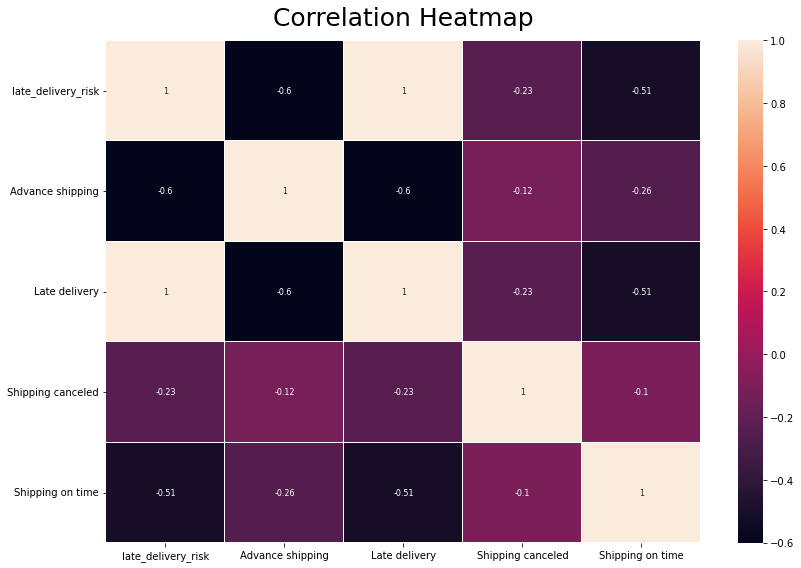

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(num_delivery_status.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

### Correlation late delivery risk with shipment_status




In [ ]:
dummy_shipment_status= pd.get_dummies(df['shipment_status'])
dummy_shipment_status.head(5)

delay  early  on time
0      1      0        0
1      1      0        0
2      1      0        0
3      1      0        0
4      1      0        0

In [ ]:
num_shipment_status= pd.concat([late_delivery_risk, dummy_shipment_status], axis =1)

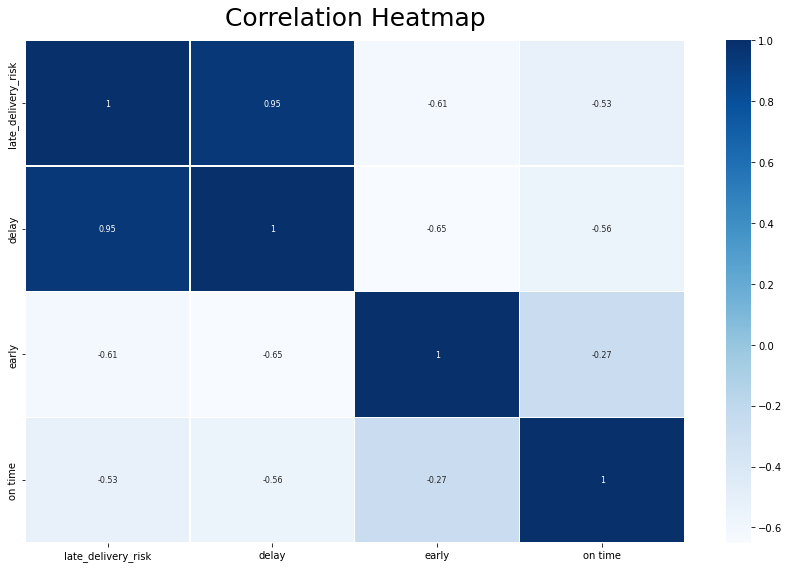

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(num_shipment_status.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8}, cmap="Blues")
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

##**Analysis & Visualization**

###**1. How long does it take for shipment in each region and states ?**



**answer**

In [ ]:
df_region = df.copy()

In [ ]:
df_region[['days_for_shipping_real']].describe()

days_for_shipping_real
count            55316.000000
mean                 3.502422
std                  1.617554
min                  0.000000
25%                  2.000000
50%                  3.000000
75%                  5.000000
max                  6.000000

In [ ]:
df_region= df.groupby('order_region',as_index=False).agg(normal=('days_for_shipping_real','mean'), fastest=('days_for_shipping_real','max'),slowest=('days_for_shipping_real','min'))
df_region.sort_values('normal')

order_region    normal  fastest  slowest
14  Southern Africa  2.990826        6        1
4      Central Asia  3.028169        6        0
0            Canada  3.305085        6        0
10          Oceania  3.442201        6        0
15  Southern Europe  3.444497        6        0
5       East Africa  3.453659        6        0
2    Central Africa  3.467949        6        0
11    South America  3.475580        6        0
18   Western Europe  3.480418        6        0
12       South Asia  3.484730        6        0
1         Caribbean  3.485018        6        0
6      Eastern Asia  3.510558        6        0
3   Central America  3.531146        6        0
9   Northern Europe  3.542035        6        0
13   Southeast Asia  3.553776        6        0
16      West Africa  3.554545        6        0
7    Eastern Europe  3.626068        6        0
17        West Asia  3.678348        6        0
8      North Africa  3.824713        6        0

In [ ]:
df_country= df.groupby(['order_country','order_state'],as_index=False).agg(normal=('days_for_shipping_real','mean'), fastest=('days_for_shipping_real','max'),slowest=('days_for_shipping_real','min'))
df_country.sort_values('normal')

order_country   order_state  normal  fastest  slowest
734       Vietnam  Tsnh Csn Ths     0.0        0        0
724     Venezuela         Sucre     0.0        0        0
511     Marruecos  Tadla-Azilal     0.0        0        0
639         Rusia        Yevrey     1.0        1        1
223      Colombia          Meta     1.0        1        1
..            ...           ...     ...      ...      ...
695  Turkmenistan      Adamaoua     6.0        6        6
682        Taiwan        Chukha     6.0        6        6
363     Indonesia      Bengkulu     6.0        6        6
401          Iran     Eskisehir     6.0        6        6
561       Nigeria          Rios     6.0        6        6

[742 rows x 5 columns]

In [ ]:
df_region.to_csv('no_1.csv', index=False)

In [ ]:
df_country.to_csv('no_1_2.csv', index=False)

###**2. What month and year in the last two years with highest amount of shipping delay & late delivery?**

####**Shipping delay**

In [ ]:
df_monthyear_all =df.copy()
df_monthyear_all['month_year']=df_monthyear_all['shipping_date'].dt.strftime('%Y-%m')
df_monthyear_all= df_monthyear_all.groupby('month_year',as_index=False).agg(total_of_ship=('order_id','count'))
df_monthyear_all

month_year  total_of_ship
0     2017-01           4771
1     2017-02           4539
2     2017-03           4924
3     2017-04           4982
4     2017-05           5015
5     2017-06           4811
6     2017-07           4934
7     2017-08           4897
8     2017-09           4903
9     2017-10           3068
10    2017-11           3060
11    2017-12           3043
12    2018-01           1419
13    2018-02            135
14    2018-03            116
15    2018-04            115
16    2018-05             90
17    2018-06             98
18    2018-07             59
19    2018-08             73
20    2018-09             60
21    2018-10             72
22    2018-11             62
23    2018-12             70

In [ ]:
df_monthyear = df.copy()
df_monthyear = df_monthyear[
  df_monthyear['shipment_status'].isin(['delay'])]
df_monthyear['shipment_status'].value_counts()

delay      31681
early          0
on time        0
Name: shipment_status, dtype: int64

In [ ]:
df_monthyear['month_year']=df_monthyear['shipping_date'].dt.strftime('%Y-%m')
df_monthyear= df_monthyear.groupby('month_year',as_index=False).agg(number_of_ship=('order_id','count'))
df_monthyear

month_year  number_of_ship
0     2017-01            2680
1     2017-02            2565
2     2017-03            2832
3     2017-04            2809
4     2017-05            2847
5     2017-06            2719
6     2017-07            2900
7     2017-08            2848
8     2017-09            2854
9     2017-10            1722
10    2017-11            1801
11    2017-12            1701
12    2018-01             827
13    2018-02              77
14    2018-03              67
15    2018-04              68
16    2018-05              65
17    2018-06              74
18    2018-07              30
19    2018-08              46
20    2018-09              35
21    2018-10              42
22    2018-11              31
23    2018-12              41

In [ ]:
df_monthyear_merge_ship = df_monthyear_all.merge(df_monthyear)
df_monthyear_merge_ship['%_ship']=round((df_monthyear_merge_ship['number_of_ship'] / df_monthyear_merge_ship['total_of_ship']) *100 ,2)
df_monthyear_merge_ship['percentage_ship'] = pd.Series(df_monthyear_merge_ship['%_ship'], dtype='string') + '%'
df_monthyear_merge_ship

month_year  total_of_ship  number_of_ship  %_ship percentage_ship
0     2017-01           4771            2680   56.17          56.17%
1     2017-02           4539            2565   56.51          56.51%
2     2017-03           4924            2832   57.51          57.51%
3     2017-04           4982            2809   56.38          56.38%
4     2017-05           5015            2847   56.77          56.77%
5     2017-06           4811            2719   56.52          56.52%
6     2017-07           4934            2900   58.78          58.78%
7     2017-08           4897            2848   58.16          58.16%
8     2017-09           4903            2854   58.21          58.21%
9     2017-10           3068            1722   56.13          56.13%
10    2017-11           3060            1801   58.86          58.86%
11    2017-12           3043            1701   55.90           55.9%
12    2018-01           1419             827   58.28          58.28%
13    2018-02            135              77   57.04          57.04%
14    2018-03            116              67   57.76          57.76%
15    2018-04            115              68   59.13          59.13%
16    2018-05             90              65   72.22          72.22%
17    2018-06             98              74   75.51          75.51%
18    2018-07             59              30   50.85          50.85%
19    2018-08             73              46   63.01          63.01%
20    2018-09             60              35   58.33          58.33%
21    2018-10             72              42   58.33          58.33%
22    2018-11             62              31   50.00           50.0%
23    2018-12             70              41   58.57          58.57%

In [ ]:
cf.go_offline()

init_notebook_mode(connected=False)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
configure_plotly_browser_state()
df_monthyear_merge_ship.iplot(kind='line',x='month_year',y='%_ship', color='gold', 
theme='solar', mode='markers+lines', title='Monthly Percentage of Shipping Delay (2017-2018)', text ='percentage_ship')
plt.show()
#caranya ganti range dari 0 gimana yak

####**Late delivery**

In [ ]:
df_monthyear_all_deliv =df.copy()
df_monthyear_all_deliv['month_year']=df_monthyear_all_deliv['order_date'].dt.strftime('%Y-%m')
df_monthyear_all_deliv= df_monthyear_all_deliv.groupby('month_year',as_index=False).agg(total_of_deliv=('order_id','count'))
df_monthyear_all_deliv

month_year  total_of_deliv
0     2017-01            5066
1     2017-02            4688
2     2017-03            5050
3     2017-04            4843
4     2017-05            5028
5     2017-06            4645
6     2017-07            4959
7     2017-08            4957
8     2017-09            4867
9     2017-10            3029
10    2017-11            3021
11    2017-12            3040
12    2018-01            1369
13    2018-02              69
14    2018-03              68
15    2018-04              69
16    2018-05              68
17    2018-06              69
18    2018-07              68
19    2018-08              69
20    2018-09              68
21    2018-10              69
22    2018-11              68
23    2018-12              69

In [ ]:
df_monthyear_deliv = df.copy()
df_monthyear_deliv = df_monthyear_deliv[
  df_monthyear_deliv['delivery_status'].isin(['Late delivery'])]
df_monthyear_deliv['delivery_status'].value_counts()

Late delivery        30158
Advance shipping         0
Shipping canceled        0
Shipping on time         0
Name: delivery_status, dtype: int64

In [ ]:
df_monthyear_deliv['month_year']=df_monthyear_deliv['order_date'].dt.strftime('%Y-%m')
df_monthyear_deliv= df_monthyear_deliv.groupby('month_year',as_index=False).agg(number_of_deliv=('order_id','count'))
df_monthyear_deliv

month_year  number_of_deliv
0     2017-01             2768
1     2017-02             2513
2     2017-03             2778
3     2017-04             2611
4     2017-05             2778
5     2017-06             2508
6     2017-07             2687
7     2017-08             2855
8     2017-09             2693
9     2017-10             1539
10    2017-11             1602
11    2017-12             1631
12    2018-01              765
13    2018-02               35
14    2018-03               40
15    2018-04               44
16    2018-05               31
17    2018-06               39
18    2018-07               38
19    2018-08               40
20    2018-09               43
21    2018-10               39
22    2018-11               45
23    2018-12               36

In [ ]:
df_monthyear_merge_deliv = df_monthyear_all_deliv.merge(df_monthyear_deliv)
df_monthyear_merge_deliv['%_deliv']=round((df_monthyear_merge_deliv['number_of_deliv'] / df_monthyear_merge_deliv['total_of_deliv']) *100 ,2)
df_monthyear_merge_deliv['percentage_deliv'] = pd.Series(df_monthyear_merge_deliv['%_deliv'], dtype='string') + '%'
df_monthyear_merge_deliv

month_year  total_of_deliv  number_of_deliv  %_deliv percentage_deliv
0     2017-01            5066             2768    54.64           54.64%
1     2017-02            4688             2513    53.60            53.6%
2     2017-03            5050             2778    55.01           55.01%
3     2017-04            4843             2611    53.91           53.91%
4     2017-05            5028             2778    55.25           55.25%
5     2017-06            4645             2508    53.99           53.99%
6     2017-07            4959             2687    54.18           54.18%
7     2017-08            4957             2855    57.60            57.6%
8     2017-09            4867             2693    55.33           55.33%
9     2017-10            3029             1539    50.81           50.81%
10    2017-11            3021             1602    53.03           53.03%
11    2017-12            3040             1631    53.65           53.65%
12    2018-01            1369              765    55.88           55.88%
13    2018-02              69               35    50.72           50.72%
14    2018-03              68               40    58.82           58.82%
15    2018-04              69               44    63.77           63.77%
16    2018-05              68               31    45.59           45.59%
17    2018-06              69               39    56.52           56.52%
18    2018-07              68               38    55.88           55.88%
19    2018-08              69               40    57.97           57.97%
20    2018-09              68               43    63.24           63.24%
21    2018-10              69               39    56.52           56.52%
22    2018-11              68               45    66.18           66.18%
23    2018-12              69               36    52.17           52.17%

In [ ]:
df_monthyear_merge = df_monthyear_merge_ship.merge(df_monthyear_merge_deliv)
df_monthyear_merge

month_year  total_of_ship  number_of_ship  %_ship percentage_ship  \
0     2017-01           4771            2680   56.17          56.17%   
1     2017-02           4539            2565   56.51          56.51%   
2     2017-03           4924            2832   57.51          57.51%   
3     2017-04           4982            2809   56.38          56.38%   
4     2017-05           5015            2847   56.77          56.77%   
5     2017-06           4811            2719   56.52          56.52%   
6     2017-07           4934            2900   58.78          58.78%   
7     2017-08           4897            2848   58.16          58.16%   
8     2017-09           4903            2854   58.21          58.21%   
9     2017-10           3068            1722   56.13          56.13%   
10    2017-11           3060            1801   58.86          58.86%   
11    2017-12           3043            1701   55.90           55.9%   
12    2018-01           1419             827   58.28          58.28%   
13    2018-02            135              77   57.04          57.04%   
14    2018-03            116              67   57.76          57.76%   
15    2018-04            115              68   59.13          59.13%   
16    2018-05             90              65   72.22          72.22%   
17    2018-06             98              74   75.51          75.51%   
18    2018-07             59              30   50.85          50.85%   
19    2018-08             73              46   63.01          63.01%   
20    2018-09             60              35   58.33          58.33%   
21    2018-10             72              42   58.33          58.33%   
22    2018-11             62              31   50.00           50.0%   
23    2018-12             70              41   58.57          58.57%   

    total_of_deliv  number_of_deliv  %_deliv percentage_deliv  
0             5066             2768    54.64           54.64%  
1             4688             2513    53.60            53.6%  
2             5050             2778    55.01           55.01%  
3             4843             2611    53.91           53.91%  
4             5028             2778    55.25           55.25%  
5             4645             2508    53.99           53.99%  
6             4959             2687    54.18           54.18%  
7             4957             2855    57.60            57.6%  
8             4867             2693    55.33           55.33%  
9             3029             1539    50.81           50.81%  
10            3021             1602    53.03           53.03%  
11            3040             1631    53.65           53.65%  
12            1369              765    55.88           55.88%  
13              69               35    50.72           50.72%  
14              68               40    58.82           58.82%  
15              69               44    63.77           63.77%  
16              68               31    45.59           45.59%  
17              69               39    56.52           56.52%  
18              68               38    55.88           55.88%  
19              69               40    57.97           57.97%  
20              68               43    63.24           63.24%  
21              69               39    56.52           56.52%  
22              68               45    66.18           66.18%  
23              69               36    52.17           52.17%

In [ ]:
configure_plotly_browser_state()
df_monthyear_merge.iplot(kind='line',x='month_year',y=['%_ship','%_deliv'], color=['gold','white'], 
theme='solar', mode='markers+lines', title='Monthly Percentage of Shipping Delay & Late Delivery (2017-2018)')
plt.show()
#caranya ganti range dari 0 gimana yak

###**3. Which country has the highest and least percentage of late delivery & shipping delay?**


####**Shipping delay**



In [ ]:
df_country_all=df.copy()
df_country_all= df_country_all.groupby('order_country',as_index=False).agg(total_of_order=('order_id','count'))
df_country_all

order_country  total_of_order
0      Afganistan              27
1         Albania              10
2        Alemania            4422
3          Angola              24
4         Argelia              97
..            ...             ...
124       Vietnam             120
125         Yemen              16
126        Yibuti               2
127        Zambia              32
128      Zimbabue              12

[129 rows x 2 columns]

In [ ]:
df_country_ship = df.copy()
df_country_ship = df_country_ship[
  df_country_ship['shipment_status'].isin(['delay'])]
df_country_ship['shipment_status'].value_counts()

delay      31681
early          0
on time        0
Name: shipment_status, dtype: int64

In [ ]:
df_country_ship= df_country_ship.groupby('order_country',as_index=False).agg(number_of_ship=('order_id','count'))
df_country_ship

order_country  number_of_ship
0      Afganistan              15
1         Albania              10
2        Alemania            2621
3          Angola              14
4         Argelia              56
..            ...             ...
118     Venezuela             271
119       Vietnam              68
120         Yemen               7
121        Zambia              17
122      Zimbabue               5

[123 rows x 2 columns]

In [ ]:
df_country_merge_ship = df_country_all.merge(df_country_ship, how='left', on='order_country')
df_country_merge_ship['number_of_ship'].fillna(
    '0',axis=0,inplace=True)
df_country_merge_ship['number_of_ship']=df_country_merge_ship['number_of_ship'].astype('int')
df_country_merge_ship

order_country  total_of_order  number_of_ship
0      Afganistan              27              15
1         Albania              10              10
2        Alemania            4422            2621
3          Angola              24              14
4         Argelia              97              56
..            ...             ...             ...
124       Vietnam             120              68
125         Yemen              16               7
126        Yibuti               2               0
127        Zambia              32              17
128      Zimbabue              12               5

[129 rows x 3 columns]

In [ ]:
df_country_merge_ship['%_ship']=(round((df_country_merge_ship['number_of_ship'] / df_country_merge_ship['total_of_order']) *100 ,2)).astype('int')
df_country_merge_ship['percentage_ship'] = pd.Series(df_country_merge_ship['%_ship'], dtype='string') + '%'
df_country_merge_ship.sort_values('%_ship')

order_country  total_of_order  number_of_ship  %_ship percentage_ship
126            Yibuti               2               0       0              0%
50   Guayana Francesa               6               0       0              0%
77               Mali              12               0       0              0%
111           Surinam               3               0       0              0%
99             Ruanda              11               0       0              0%
..                ...             ...             ...     ...             ...
74          Macedonia               1               1     100            100%
105           Somalia               8               8     100            100%
113            Taiwan               1               1     100            100%
39         Eslovaquia               2               2     100            100%
102      Saudi Arabia               5               5     100            100%

[129 rows x 5 columns]

####**Late delivery**

In [ ]:
df_country_deliv = df.copy()
df_country_deliv = df_country_deliv[
  df_country_deliv['delivery_status'].isin(['Late delivery'])]
df_country_deliv['delivery_status'].value_counts()

Late delivery        30158
Advance shipping         0
Shipping canceled        0
Shipping on time         0
Name: delivery_status, dtype: int64

In [ ]:
df_country_deliv= df_country_deliv.groupby('order_country',as_index=False).agg(number_of_deliv=('order_id','count'))
df_country_deliv

order_country  number_of_deliv
0      Afganistan               15
1         Albania               10
2        Alemania             2463
3          Angola               11
4         Argelia               52
..            ...              ...
118     Venezuela              252
119       Vietnam               67
120         Yemen                3
121        Zambia               17
122      Zimbabue                5

[123 rows x 2 columns]

In [ ]:
df_country_merge_deliv = df_country_all.merge(df_country_deliv, how='left', on='order_country')
df_country_merge_deliv['number_of_deliv'].fillna(
    '0',axis=0,inplace=True)
df_country_merge_deliv['number_of_deliv']=df_country_merge_deliv['number_of_deliv'].astype('int')
df_country_merge_deliv

order_country  total_of_order  number_of_deliv
0      Afganistan              27               15
1         Albania              10               10
2        Alemania            4422             2463
3          Angola              24               11
4         Argelia              97               52
..            ...             ...              ...
124       Vietnam             120               67
125         Yemen              16                3
126        Yibuti               2                0
127        Zambia              32               17
128      Zimbabue              12                5

[129 rows x 3 columns]

In [ ]:
df_country_merge_deliv['%_deliv']=(round((df_country_merge_deliv['number_of_deliv'] / df_country_merge_deliv['total_of_order']) *100 ,2)).astype('int')
df_country_merge_deliv['percentage_deliv'] = pd.Series(df_country_merge_deliv['%_deliv'], dtype='string') + '%'
df_country_merge_deliv.sort_values('%_deliv')

order_country  total_of_order  number_of_deliv  %_deliv  \
17   Bosnia y Herzegovina               2                0        0   
126                Yibuti               2                0        0   
50       Guayana Francesa               6                0        0   
77                   Mali              12                0        0   
111               Surinam               3                0        0   
..                    ...             ...              ...      ...   
113                Taiwan               1                1      100   
39             Eslovaquia               2                2      100   
105               Somalia               8                8      100   
73             Luxemburgo               4                4      100   
102          Saudi Arabia               5                5      100   

    percentage_deliv  
17                0%  
126               0%  
50                0%  
77                0%  
111               0%  
..               ...  
113             100%  
39              100%  
105             100%  
73              100%  
102             100%  

[129 rows x 5 columns]

In [ ]:
df_country_merge = df_country_merge_ship.merge(df_country_merge_deliv)
df_country_merge

order_country  total_of_order  number_of_ship  %_ship percentage_ship  \
0      Afganistan              27              15      55             55%   
1         Albania              10              10     100            100%   
2        Alemania            4422            2621      59             59%   
3          Angola              24              14      58             58%   
4         Argelia              97              56      57             57%   
..            ...             ...             ...     ...             ...   
124       Vietnam             120              68      56             56%   
125         Yemen              16               7      43             43%   
126        Yibuti               2               0       0              0%   
127        Zambia              32              17      53             53%   
128      Zimbabue              12               5      41             41%   

     number_of_deliv  %_deliv percentage_deliv  
0                 15       55              55%  
1                 10      100             100%  
2               2463       55              55%  
3                 11       45              45%  
4                 52       53              53%  
..               ...      ...              ...  
124               67       55              55%  
125                3       18              18%  
126                0        0               0%  
127               17       53              53%  
128                5       41              41%  

[129 rows x 8 columns]

In [ ]:
df_country_merge.to_csv('gfp.csv', index=False)

###**4. Which region with highest and least percentage of late delivery & shipping delay?**

####**Shipping delay**

In [ ]:
df_region_all=df.copy()
df_region_all= df_region_all.groupby('order_region',as_index=False).agg(total_of_order=('order_id','count'))
df_region_all

order_region  total_of_order
0            Canada             118
1         Caribbean            4105
2    Central Africa             156
3   Central America           14384
4      Central Asia              71
5       East Africa             205
6      Eastern Asia            1326
7    Eastern Europe             468
8      North Africa             348
9   Northern Europe            4413
10          Oceania            1436
11    South America            7330
12       South Asia            1277
13   Southeast Asia            1748
14  Southern Africa             109
15  Southern Europe            4225
16      West Africa             440
17        West Asia             799
18   Western Europe           12358

In [ ]:
df_region_ship = df.copy()
df_region_ship = df_region_ship[
  ~df_region_ship['shipment_status'].isin(['delay'])]
df_region_ship['shipment_status'].value_counts()

early      13282
on time    10353
delay          0
Name: shipment_status, dtype: int64

In [ ]:
df_region_ship= df_region_ship.groupby('order_region',as_index=False).agg(number_of_ship=('order_id','count'))
df_region_ship

order_region  number_of_ship
0            Canada              64
1         Caribbean            1852
2    Central Africa              66
3   Central America            6139
4      Central Asia              23
5       East Africa              98
6      Eastern Asia             557
7    Eastern Europe             192
8      North Africa             161
9   Northern Europe            1950
10          Oceania             604
11    South America            3122
12       South Asia             549
13   Southeast Asia             728
14  Southern Africa              50
15  Southern Europe            1788
16      West Africa             222
17        West Asia             330
18   Western Europe            5140

In [ ]:
df_region_merge_ship = df_region_all.merge(df_region_ship, how='left', on='order_region')
df_region_merge_ship['%_ship']=round((df_region_merge_ship['number_of_ship'] / df_region_merge_ship['total_of_order']) *100 ,2)
df_region_merge_ship['percentage_ship'] = pd.Series(df_region_merge_ship['%_ship'], dtype='string') + '%'
df_region_merge_ship.sort_values('%_ship')

order_region  total_of_order  number_of_ship  %_ship percentage_ship
4      Central Asia              71              23   32.39          32.39%
7    Eastern Europe             468             192   41.03          41.03%
17        West Asia             799             330   41.30           41.3%
18   Western Europe           12358            5140   41.59          41.59%
13   Southeast Asia            1748             728   41.65          41.65%
6      Eastern Asia            1326             557   42.01          42.01%
10          Oceania            1436             604   42.06          42.06%
2    Central Africa             156              66   42.31          42.31%
15  Southern Europe            4225            1788   42.32          42.32%
11    South America            7330            3122   42.59          42.59%
3   Central America           14384            6139   42.68          42.68%
12       South Asia            1277             549   42.99          42.99%
9   Northern Europe            4413            1950   44.19          44.19%
1         Caribbean            4105            1852   45.12          45.12%
14  Southern Africa             109              50   45.87          45.87%
8      North Africa             348             161   46.26          46.26%
5       East Africa             205              98   47.80           47.8%
16      West Africa             440             222   50.45          50.45%
0            Canada             118              64   54.24          54.24%

####**Late delivery**

In [ ]:
df_region_deliv = df.copy()
df_region_deliv = df_region_deliv[
  df_region_deliv['delivery_status'].isin(['Late delivery'])]
df_region_deliv['delivery_status'].value_counts()

Late delivery        30158
Advance shipping         0
Shipping canceled        0
Shipping on time         0
Name: delivery_status, dtype: int64

In [ ]:
df_region_deliv= df_region_deliv.groupby('order_region',as_index=False).agg(number_of_deliv=('order_id','count'))
df_region_deliv

order_region  number_of_deliv
0            Canada               47
1         Caribbean             2131
2    Central Africa               84
3   Central America             7875
4      Central Asia               48
5       East Africa              107
6      Eastern Asia              731
7    Eastern Europe              267
8      North Africa              183
9   Northern Europe             2344
10          Oceania              792
11    South America             3991
12       South Asia              706
13   Southeast Asia              973
14  Southern Africa               59
15  Southern Europe             2329
16      West Africa              199
17        West Asia              447
18   Western Europe             6845

In [ ]:
df_region_merge_deliv = df_region_all.merge(df_region_deliv, how='left', on='order_region')
df_region_merge_deliv['%_deliv']=round((df_region_merge_deliv['number_of_deliv'] / df_region_merge_deliv['total_of_order']) *100 ,2)
df_region_merge_deliv['percentage_deliv'] = pd.Series(df_region_merge_deliv['%_deliv'], dtype='string') + '%'
df_region_merge_deliv.sort_values('%_deliv')

order_region  total_of_order  number_of_deliv  %_deliv percentage_deliv
0            Canada             118               47    39.83           39.83%
16      West Africa             440              199    45.23           45.23%
1         Caribbean            4105             2131    51.91           51.91%
5       East Africa             205              107    52.20            52.2%
8      North Africa             348              183    52.59           52.59%
9   Northern Europe            4413             2344    53.12           53.12%
2    Central Africa             156               84    53.85           53.85%
14  Southern Africa             109               59    54.13           54.13%
11    South America            7330             3991    54.45           54.45%
3   Central America           14384             7875    54.75           54.75%
15  Southern Europe            4225             2329    55.12           55.12%
6      Eastern Asia            1326              731    55.13           55.13%
10          Oceania            1436              792    55.15           55.15%
12       South Asia            1277              706    55.29           55.29%
18   Western Europe           12358             6845    55.39           55.39%
13   Southeast Asia            1748              973    55.66           55.66%
17        West Asia             799              447    55.94           55.94%
7    Eastern Europe             468              267    57.05           57.05%
4      Central Asia              71               48    67.61           67.61%

In [ ]:
df_region_merge = df_region_merge_ship.merge(df_region_merge_deliv)
df_region_merge

order_region  total_of_order  number_of_ship  %_ship percentage_ship  \
0            Canada             118              64   54.24          54.24%   
1         Caribbean            4105            1852   45.12          45.12%   
2    Central Africa             156              66   42.31          42.31%   
3   Central America           14384            6139   42.68          42.68%   
4      Central Asia              71              23   32.39          32.39%   
5       East Africa             205              98   47.80           47.8%   
6      Eastern Asia            1326             557   42.01          42.01%   
7    Eastern Europe             468             192   41.03          41.03%   
8      North Africa             348             161   46.26          46.26%   
9   Northern Europe            4413            1950   44.19          44.19%   
10          Oceania            1436             604   42.06          42.06%   
11    South America            7330            3122   42.59          42.59%   
12       South Asia            1277             549   42.99          42.99%   
13   Southeast Asia            1748             728   41.65          41.65%   
14  Southern Africa             109              50   45.87          45.87%   
15  Southern Europe            4225            1788   42.32          42.32%   
16      West Africa             440             222   50.45          50.45%   
17        West Asia             799             330   41.30           41.3%   
18   Western Europe           12358            5140   41.59          41.59%   

    number_of_deliv  %_deliv percentage_deliv  
0                47    39.83           39.83%  
1              2131    51.91           51.91%  
2                84    53.85           53.85%  
3              7875    54.75           54.75%  
4                48    67.61           67.61%  
5               107    52.20            52.2%  
6               731    55.13           55.13%  
7               267    57.05           57.05%  
8               183    52.59           52.59%  
9              2344    53.12           53.12%  
10              792    55.15           55.15%  
11             3991    54.45           54.45%  
12              706    55.29           55.29%  
13              973    55.66           55.66%  
14               59    54.13           54.13%  
15             2329    55.12           55.12%  
16              199    45.23           45.23%  
17              447    55.94           55.94%  
18             6845    55.39           55.39%

In [ ]:
df_region_merge.to_csv('gfp.csv', index=False)

###**5. Which departement store with highest and least percentage of late delivery & shipping delay?**

####**Shipping delay**

In [ ]:
df_dep_all=df.copy()
df_dep_all= df_dep_all.groupby('department_name',as_index=False).agg(total_of_order=('order_id','count'))
df_dep_all

department_name  total_of_order
0              Apparel           14968
1            Book Shop             405
2           Discs Shop            2025
3             Fan Shop           18854
4              Fitness             958
5             Footwear            3886
6                 Golf            8860
7   Health and Beauty              362
8             Outdoors            3042
9             Pet Shop             492
10          Technology            1464

In [ ]:
df_dep_ship = df.copy()
df_dep_ship = df_dep_ship[
  df_dep_ship['shipment_status'].isin(['delay'])]
df_dep_ship['shipment_status'].value_counts()

delay      31681
early          0
on time        0
Name: shipment_status, dtype: int64

In [ ]:
df_dep_ship= df_dep_ship.groupby('department_name',as_index=False).agg(number_of_ship=('order_id','count'))
df_dep_ship

department_name  number_of_ship
0              Apparel            8518
1            Book Shop             233
2           Discs Shop            1149
3             Fan Shop           10852
4              Fitness             562
5             Footwear            2199
6                 Golf            5062
7   Health and Beauty              212
8             Outdoors            1738
9             Pet Shop             302
10          Technology             854

In [ ]:
df_dep_merge_ship = df_dep_all.merge(df_dep_ship, how='left', on='department_name')
df_dep_merge_ship['%_ship']=round((df_dep_merge_ship['number_of_ship'] / df_dep_merge_ship['total_of_order']) *100 ,2)
df_dep_merge_ship['percentage_ship'] = pd.Series(df_dep_merge_ship['%_ship'], dtype='string') + '%'
df_dep_merge_ship.sort_values('%_ship')

department_name  total_of_order  number_of_ship  %_ship percentage_ship
5             Footwear            3886            2199   56.59          56.59%
2           Discs Shop            2025            1149   56.74          56.74%
0              Apparel           14968            8518   56.91          56.91%
6                 Golf            8860            5062   57.13          57.13%
8             Outdoors            3042            1738   57.13          57.13%
1            Book Shop             405             233   57.53          57.53%
3             Fan Shop           18854           10852   57.56          57.56%
10          Technology            1464             854   58.33          58.33%
7   Health and Beauty              362             212   58.56          58.56%
4              Fitness             958             562   58.66          58.66%
9             Pet Shop             492             302   61.38          61.38%

####**Late delivery**

In [ ]:
df_dep_deliv = df.copy()
df_dep_deliv = df_dep_deliv[
  df_dep_deliv['delivery_status'].isin(['Late delivery'])]
df_dep_deliv['delivery_status'].value_counts()

Late delivery        30158
Advance shipping         0
Shipping canceled        0
Shipping on time         0
Name: delivery_status, dtype: int64

In [ ]:
df_dep_deliv= df_dep_deliv.groupby('department_name',as_index=False).agg(number_of_deliv=('order_id','count'))
df_dep_deliv

department_name  number_of_deliv
0              Apparel             8103
1            Book Shop              229
2           Discs Shop             1103
3             Fan Shop            10316
4              Fitness              535
5             Footwear             2088
6                 Golf             4823
7   Health and Beauty               202
8             Outdoors             1664
9             Pet Shop              290
10          Technology              805

In [ ]:
df_dep_merge_deliv = df_dep_all.merge(df_dep_deliv, how='left', on='department_name')
df_dep_merge_deliv['%_deliv']=round((df_dep_merge_deliv['number_of_deliv'] / df_dep_merge_deliv['total_of_order']) *100 ,2)
df_dep_merge_deliv['percentage_deliv'] = pd.Series(df_dep_merge_deliv['%_deliv'], dtype='string') + '%'
df_dep_merge_deliv.sort_values('%_deliv')

department_name  total_of_order  number_of_deliv  %_deliv  \
5             Footwear            3886             2088    53.73   
0              Apparel           14968             8103    54.14   
6                 Golf            8860             4823    54.44   
2           Discs Shop            2025             1103    54.47   
8             Outdoors            3042             1664    54.70   
3             Fan Shop           18854            10316    54.72   
10          Technology            1464              805    54.99   
7   Health and Beauty              362              202    55.80   
4              Fitness             958              535    55.85   
1            Book Shop             405              229    56.54   
9             Pet Shop             492              290    58.94   

   percentage_deliv  
5            53.73%  
0            54.14%  
6            54.44%  
2            54.47%  
8             54.7%  
3            54.72%  
10           54.99%  
7             55.8%  
4            55.85%  
1            56.54%  
9            58.94%

In [ ]:
df_dep_merge = df_dep_merge_ship.merge(df_dep_merge_deliv)
df_dep_merge

department_name  total_of_order  number_of_ship  %_ship  \
0              Apparel           14968            8518   56.91   
1            Book Shop             405             233   57.53   
2           Discs Shop            2025            1149   56.74   
3             Fan Shop           18854           10852   57.56   
4              Fitness             958             562   58.66   
5             Footwear            3886            2199   56.59   
6                 Golf            8860            5062   57.13   
7   Health and Beauty              362             212   58.56   
8             Outdoors            3042            1738   57.13   
9             Pet Shop             492             302   61.38   
10          Technology            1464             854   58.33   

   percentage_ship  number_of_deliv  %_deliv percentage_deliv  
0           56.91%             8103    54.14           54.14%  
1           57.53%              229    56.54           56.54%  
2           56.74%             1103    54.47           54.47%  
3           57.56%            10316    54.72           54.72%  
4           58.66%              535    55.85           55.85%  
5           56.59%             2088    53.73           53.73%  
6           57.13%             4823    54.44           54.44%  
7           58.56%              202    55.80            55.8%  
8           57.13%             1664    54.70            54.7%  
9           61.38%              290    58.94           58.94%  
10          58.33%              805    54.99           54.99%

###**6. Which customer segment with highest and least percentage of late delivery?**

In [ ]:
df_cus_all=df.copy()
df_cus_all= df_cus_all.groupby('customer_segment',as_index=False).agg(total_of_order=('order_id','count'))
df_cus_all

customer_segment  total_of_order
0         Consumer           28512
1        Corporate           16869
2      Home Office            9935

In [ ]:
df_cus_deliv = df.copy()
df_cus_deliv = df_cus_deliv[
  df_cus_deliv['delivery_status'].isin(['Late delivery'])]
df_cus_deliv['delivery_status'].value_counts()

Late delivery        30158
Advance shipping         0
Shipping canceled        0
Shipping on time         0
Name: delivery_status, dtype: int64

In [ ]:
df_cus_deliv= df_cus_deliv.groupby('customer_segment',as_index=False).agg(number_of_deliv=('order_id','count'))
df_cus_deliv

customer_segment  number_of_deliv
0         Consumer            15523
1        Corporate             9104
2      Home Office             5531

In [ ]:
df_cus_merge_deliv = df_cus_all.merge(df_cus_deliv, how='left', on='customer_segment')
df_cus_merge_deliv['%_deliv']=round((df_cus_merge_deliv['number_of_deliv'] / df_cus_merge_deliv['total_of_order']) *100 ,2)
df_cus_merge_deliv['percentage_deliv'] = pd.Series(df_cus_merge_deliv['%_deliv'], dtype='string') + '%'
df_cus_merge_deliv.sort_values('%_deliv')

customer_segment  total_of_order  number_of_deliv  %_deliv percentage_deliv
1        Corporate           16869             9104    53.97           53.97%
0         Consumer           28512            15523    54.44           54.44%
2      Home Office            9935             5531    55.67           55.67%

###**7. Top 10 order's category with high amount of late risk order**

Group by product category

In [ ]:
df['late_delivery_risk'].value_counts()

1    30158
0    25158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_laterisk_all=df.copy()

In [ ]:
df_laterisk_all.groupby('category_name')['late_delivery_risk'].value_counts().sort_values(ascending=False)

category_name         late_delivery_risk
Cleats                1                     3594
Men's Footwear        1                     3301
Women's Apparel       1                     3096
Cleats                0                     3048
Indoor/Outdoor Games  1                     2917
                                            ... 
Tennis & Racquet      1                       25
Fitness Accessories   1                       24
                      0                       20
Golf Bags & Carts     0                       19
Tennis & Racquet      0                       19
Name: late_delivery_risk, Length: 100, dtype: int64

In [ ]:
df_laterisk = df[df['late_delivery_risk']==1]

In [ ]:
df_laterisk.groupby('category_name')['late_delivery_risk'].value_counts().sort_values(ascending=False)

category_name         late_delivery_risk
Cleats                1                     3594
Men's Footwear        1                     3301
Women's Apparel       1                     3096
Indoor/Outdoor Games  1                     2917
Fishing               1                     2600
Water Sports          1                     2302
Camping & Hiking      1                     2125
Cardio Equipment      1                     1800
Shop By Sport         1                     1642
Video Games           1                      455
Women's Clothing      1                      367
Children's Clothing   1                      348
Cameras               1                      344
Toys                  1                      291
Pet Supplies          1                      290
Crafts                1                      271
Garden                1                      270
DVDs                  1                      259
Music                 1                      248
Consumer Electronics  1     

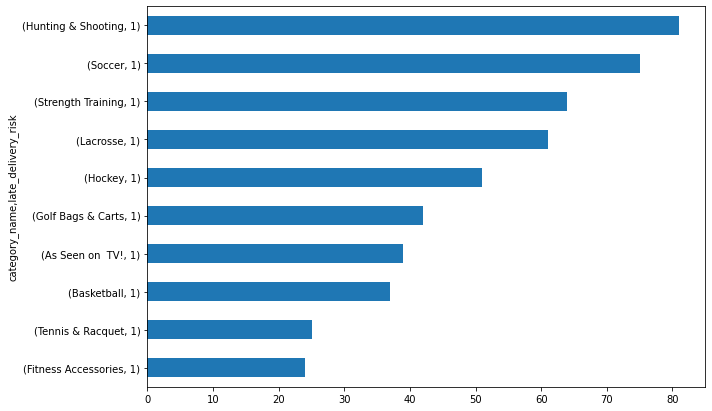

In [ ]:
df_laterisk.groupby('category_name')['late_delivery_risk'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,7))

In [ ]:
df_laterisk_all = df.copy()
df_laterisk_all = df_laterisk_all.groupby('category_name',as_index=False).agg(total_of_order=('order_id','count'))
df_laterisk_all

category_name  total_of_order
0            Accessories             241
1        As Seen on  TV!              68
2                  Baby              207
3    Baseball & Softball             150
4             Basketball              67
5                 Books              405
6           Boxing & MMA             173
7                   CDs              271
8               Cameras              592
9       Camping & Hiking            3867
10      Cardio Equipment            3371
11   Children's Clothing             651
12                Cleats            6642
13             Computers             442
14  Consumer Electronics             430
15                Crafts             484
16                  DVDs             483
17           Electronics             388
18               Fishing            4751
19   Fitness Accessories              44
20                Garden             484
21        Girls' Apparel             146
22          Golf Apparel             176
23     Golf Bags & Carts              61
24            Golf Balls             184
25           Golf Gloves             331
26            Golf Shoes             259
27     Health and Beauty             362
28                Hockey              91
29    Hunting & Shooting             160
30  Indoor/Outdoor Games            5226
31      Kids' Golf Clubs             384
32              Lacrosse             111
33        Men's Clothing             208
34        Men's Footwear            6126
35      Men's Golf Clubs             283
36                 Music             434
37          Pet Supplies             492
38         Shop By Sport            2987
39                Soccer             138
40        Sporting Goods             357
41     Strength Training             111
42      Tennis & Racquet              44
43                  Toys             529
44              Trade-In             189
45           Video Games             837
46          Water Sports            4321
47       Women's Apparel            5727
48      Women's Clothing             650
49    Women's Golf Clubs             181

In [ ]:
df_laterisk = df.copy()
df_laterisk = df_laterisk[
  df_laterisk['late_delivery_risk'].isin([1])]
df_laterisk['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_laterisk= df_laterisk.groupby('category_name',as_index=False).agg(number_of_order=('order_id','count'))
df_laterisk

category_name  number_of_order
0            Accessories              128
1        As Seen on  TV!               39
2                  Baby               109
3    Baseball & Softball               88
4             Basketball               37
5                 Books               229
6           Boxing & MMA               93
7                   CDs               141
8               Cameras               344
9       Camping & Hiking             2125
10      Cardio Equipment             1800
11   Children's Clothing              348
12                Cleats             3594
13             Computers              224
14  Consumer Electronics              237
15                Crafts              271
16                  DVDs              259
17           Electronics              222
18               Fishing             2600
19   Fitness Accessories               24
20                Garden              270
21        Girls' Apparel               85
22          Golf Apparel               87
23     Golf Bags & Carts               42
24            Golf Balls              108
25           Golf Gloves              194
26            Golf Shoes              135
27     Health and Beauty              202
28                Hockey               51
29    Hunting & Shooting               81
30  Indoor/Outdoor Games             2917
31      Kids' Golf Clubs              205
32              Lacrosse               61
33        Men's Clothing              113
34        Men's Footwear             3301
35      Men's Golf Clubs              135
36                 Music              248
37          Pet Supplies              290
38         Shop By Sport             1642
39                Soccer               75
40        Sporting Goods              198
41     Strength Training               64
42      Tennis & Racquet               25
43                  Toys              291
44              Trade-In              109
45           Video Games              455
46          Water Sports             2302
47       Women's Apparel             3096
48      Women's Clothing              367
49    Women's Golf Clubs               97

In [ ]:
df_laterisk_merge = df_laterisk_all.merge(df_laterisk, how='left', on='category_name')
df_laterisk_merge['%']=round((df_laterisk_merge['number_of_order'] / df_laterisk_merge['total_of_order']) *100 ,2)
df_laterisk_merge['percentage'] = pd.Series(df_laterisk_merge['%'], dtype='string') + '%'
df_laterisk_merge.sort_values('%')

category_name  total_of_order  number_of_order      % percentage
35      Men's Golf Clubs             283              135  47.70      47.7%
22          Golf Apparel             176               87  49.43     49.43%
29    Hunting & Shooting             160               81  50.62     50.62%
13             Computers             442              224  50.68     50.68%
7                   CDs              271              141  52.03     52.03%
26            Golf Shoes             259              135  52.12     52.12%
2                  Baby              207              109  52.66     52.66%
0            Accessories             241              128  53.11     53.11%
46          Water Sports            4321             2302  53.27     53.27%
31      Kids' Golf Clubs             384              205  53.39     53.39%
10      Cardio Equipment            3371             1800  53.40      53.4%
11   Children's Clothing             651              348  53.46     53.46%
49    Women's Golf Clubs             181               97  53.59     53.59%
16                  DVDs             483              259  53.62     53.62%
6           Boxing & MMA             173               93  53.76     53.76%
34        Men's Footwear            6126             3301  53.89     53.89%
47       Women's Apparel            5727             3096  54.06     54.06%
12                Cleats            6642             3594  54.11     54.11%
33        Men's Clothing             208              113  54.33     54.33%
39                Soccer             138               75  54.35     54.35%
45           Video Games             837              455  54.36     54.36%
19   Fitness Accessories              44               24  54.55     54.55%
18               Fishing            4751             2600  54.73     54.73%
9       Camping & Hiking            3867             2125  54.95     54.95%
32              Lacrosse             111               61  54.95     54.95%
38         Shop By Sport            2987             1642  54.97     54.97%
43                  Toys             529              291  55.01     55.01%
14  Consumer Electronics             430              237  55.12     55.12%
4             Basketball              67               37  55.22     55.22%
40        Sporting Goods             357              198  55.46     55.46%
20                Garden             484              270  55.79     55.79%
27     Health and Beauty             362              202  55.80      55.8%
30  Indoor/Outdoor Games            5226             2917  55.82     55.82%
15                Crafts             484              271  55.99     55.99%
28                Hockey              91               51  56.04     56.04%
48      Women's Clothing             650              367  56.46     56.46%
5                 Books              405              229  56.54     56.54%
42      Tennis & Racquet              44               25  56.82     56.82%
36                 Music             434              248  57.14     57.14%
17           Electronics             388              222  57.22     57.22%
1        As Seen on  TV!              68               39  57.35     57.35%
41     Strength Training             111               64  57.66     57.66%
44              Trade-In             189              109  57.67     57.67%
8               Cameras              592              344  58.11     58.11%
21        Girls' Apparel             146               85  58.22     58.22%
25           Golf Gloves             331              194  58.61     58.61%
3    Baseball & Softball             150               88  58.67     58.67%
24            Golf Balls             184              108  58.70      58.7%
37          Pet Supplies             492              290  58.94     58.94%
23     Golf Bags & Carts              61               42  68.85     68.85%

Group by department store

In [ ]:
df_laterisk = df[df['late_delivery_risk']==1]
df_laterisk.groupby('department_name')['late_delivery_risk'].value_counts().sort_values(ascending=False)

department_name     late_delivery_risk
Fan Shop            1                     10316
Apparel             1                      8103
Golf                1                      4823
Footwear            1                      2088
Outdoors            1                      1664
Discs Shop          1                      1103
Technology          1                       805
Fitness             1                       535
Pet Shop            1                       290
Book Shop           1                       229
Health and Beauty   1                       202
Name: late_delivery_risk, dtype: int64

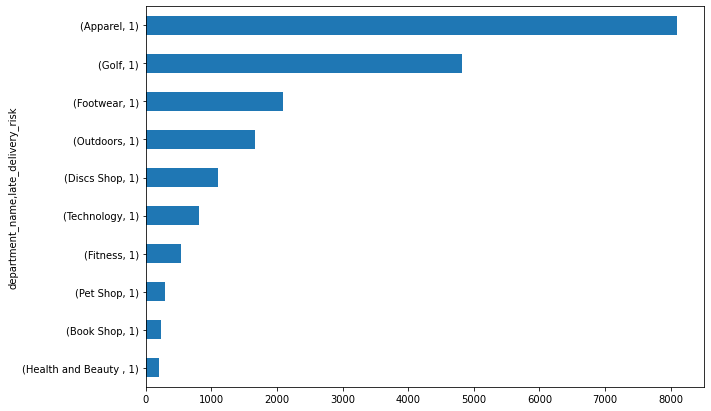

In [ ]:
df_laterisk.groupby('department_name')['late_delivery_risk'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,7))

In [ ]:
df_laterisk_all_2 = df.copy()
df_laterisk_all_2 = df_laterisk_all_2.groupby('department_name',as_index=False).agg(total_of_order=('order_id','count'))
df_laterisk_all_2

department_name  total_of_order
0              Apparel           14968
1            Book Shop             405
2           Discs Shop            2025
3             Fan Shop           18854
4              Fitness             958
5             Footwear            3886
6                 Golf            8860
7   Health and Beauty              362
8             Outdoors            3042
9             Pet Shop             492
10          Technology            1464

In [ ]:
df_laterisk_2 = df.copy()
df_laterisk_2 = df_laterisk_2[
  df_laterisk_2['late_delivery_risk'].isin([1])]
df_laterisk_2['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_laterisk_2= df_laterisk_2.groupby('department_name',as_index=False).agg(number_of_order=('order_id','count'))
df_laterisk_2

department_name  number_of_order
0              Apparel             8103
1            Book Shop              229
2           Discs Shop             1103
3             Fan Shop            10316
4              Fitness              535
5             Footwear             2088
6                 Golf             4823
7   Health and Beauty               202
8             Outdoors             1664
9             Pet Shop              290
10          Technology              805

In [ ]:
df_laterisk_merge_2 = df_laterisk_all_2.merge(df_laterisk_2, how='left', on='department_name')
df_laterisk_merge_2['%']=round((df_laterisk_merge_2['number_of_order'] / df_laterisk_merge_2['total_of_order']) *100 ,2)
df_laterisk_merge_2['percentage'] = pd.Series(df_laterisk_merge_2['%'], dtype='string') + '%'
df_laterisk_merge_2.sort_values('%')

department_name  total_of_order  number_of_order      % percentage
5             Footwear            3886             2088  53.73     53.73%
0              Apparel           14968             8103  54.14     54.14%
6                 Golf            8860             4823  54.44     54.44%
2           Discs Shop            2025             1103  54.47     54.47%
8             Outdoors            3042             1664  54.70      54.7%
3             Fan Shop           18854            10316  54.72     54.72%
10          Technology            1464              805  54.99     54.99%
7   Health and Beauty              362              202  55.80      55.8%
4              Fitness             958              535  55.85     55.85%
1            Book Shop             405              229  56.54     56.54%
9             Pet Shop             492              290  58.94     58.94%

Group by quantity item

In [ ]:
df_laterisk = df[df['late_delivery_risk']==1]
df_laterisk.groupby('order_item_quantity')['late_delivery_risk'].value_counts().sort_values(ascending=False)

order_item_quantity  late_delivery_risk
1                    1                     18675
3                    1                      2945
4                    1                      2877
5                    1                      2872
2                    1                      2789
Name: late_delivery_risk, dtype: int64

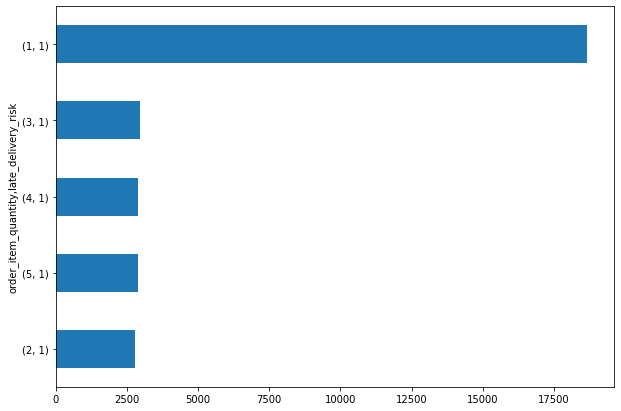

In [ ]:
df_laterisk.groupby('order_item_quantity')['late_delivery_risk'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,7))

In [ ]:
df_laterisk_all_3 = df.copy()

In [ ]:
df_laterisk_all_3 = df_laterisk_all_3.groupby('order_item_quantity',as_index=False).agg(total_of_order=('order_id','count'))
df_laterisk_all_3

order_item_quantity  total_of_order
0                    1           34169
1                    2            5210
2                    3            5344
3                    4            5342
4                    5            5251

In [ ]:
df_laterisk_3 = df.copy()
df_laterisk_3 = df_laterisk_3[
  df_laterisk_3['late_delivery_risk'].isin([1])]
df_laterisk_3['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_laterisk_3= df_laterisk_3.groupby('order_item_quantity',as_index=False).agg(number_of_order=('order_id','count'))
df_laterisk_3

order_item_quantity  number_of_order
0                    1            18675
1                    2             2789
2                    3             2945
3                    4             2877
4                    5             2872

In [ ]:
df_laterisk_merge_3 = df_laterisk_all_3.merge(df_laterisk_3, how='left', on='order_item_quantity')
df_laterisk_merge_3['%']=round((df_laterisk_merge_3['number_of_order'] / df_laterisk_merge_3['total_of_order']) *100 ,2)
df_laterisk_merge_3['percentage'] = pd.Series(df_laterisk_merge_3['%'], dtype='string') + '%'
df_laterisk_merge_3.sort_values('%')

order_item_quantity  total_of_order  number_of_order      % percentage
1                    2            5210             2789  53.53     53.53%
3                    4            5342             2877  53.86     53.86%
0                    1           34169            18675  54.65     54.65%
4                    5            5251             2872  54.69     54.69%
2                    3            5344             2945  55.11     55.11%

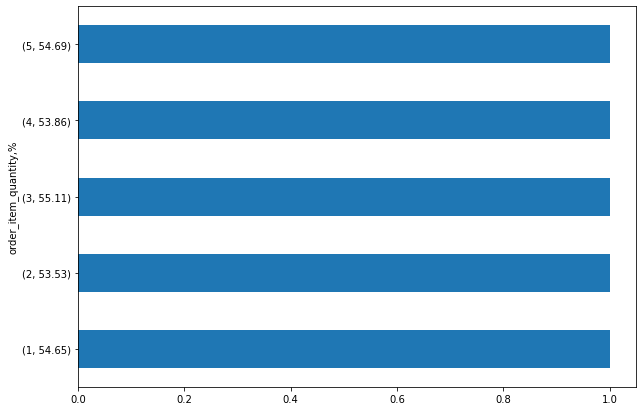

In [ ]:
df_laterisk_merge_3.groupby('order_item_quantity')['%'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,7))

###**8. Top 10 location with high amount of late risk order**

Group by order region

In [ ]:
df_laterisk = df[df['late_delivery_risk']==1]
df_laterisk.groupby('order_region')['late_delivery_risk'].value_counts().sort_values(ascending=False)

order_region     late_delivery_risk
Central America  1                     7875
Western Europe   1                     6845
South America    1                     3991
Northern Europe  1                     2344
Southern Europe  1                     2329
Caribbean        1                     2131
Southeast Asia   1                      973
Oceania          1                      792
Eastern Asia     1                      731
South Asia       1                      706
West Asia        1                      447
Eastern Europe   1                      267
West Africa      1                      199
North Africa     1                      183
East Africa      1                      107
Central Africa   1                       84
Southern Africa  1                       59
Central Asia     1                       48
Canada           1                       47
Name: late_delivery_risk, dtype: int64

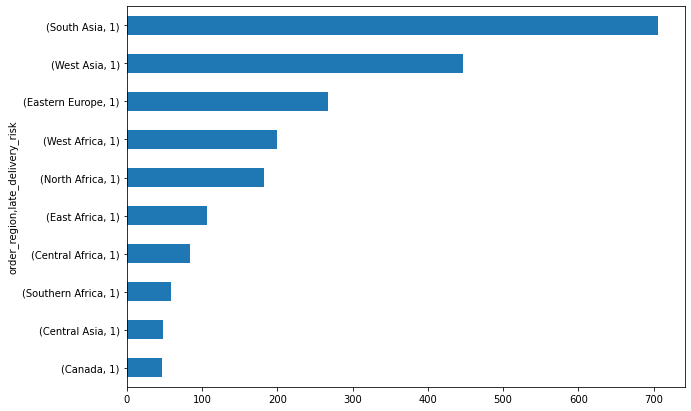

In [ ]:
df_laterisk.groupby('order_region')['late_delivery_risk'].value_counts().sort_values(ascending=True).head(10).plot(kind='barh',figsize=(10,7))

In [ ]:
df_location_all = df.copy()

In [ ]:
df_location_all = df_location_all.groupby('order_region',as_index=False).agg(total_of_order=('order_id','count'))
df_location_all

order_region  total_of_order
0            Canada             118
1         Caribbean            4105
2    Central Africa             156
3   Central America           14384
4      Central Asia              71
5       East Africa             205
6      Eastern Asia            1326
7    Eastern Europe             468
8      North Africa             348
9   Northern Europe            4413
10          Oceania            1436
11    South America            7330
12       South Asia            1277
13   Southeast Asia            1748
14  Southern Africa             109
15  Southern Europe            4225
16      West Africa             440
17        West Asia             799
18   Western Europe           12358

In [ ]:
df_location = df.copy()
df_location = df_location[
  df_location['late_delivery_risk'].isin([1])]
df_location['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_location= df_location.groupby('order_region',as_index=False).agg(number_of_order_risk=('order_id','count'))
df_location

order_region  number_of_order_risk
0            Canada                    47
1         Caribbean                  2131
2    Central Africa                    84
3   Central America                  7875
4      Central Asia                    48
5       East Africa                   107
6      Eastern Asia                   731
7    Eastern Europe                   267
8      North Africa                   183
9   Northern Europe                  2344
10          Oceania                   792
11    South America                  3991
12       South Asia                   706
13   Southeast Asia                   973
14  Southern Africa                    59
15  Southern Europe                  2329
16      West Africa                   199
17        West Asia                   447
18   Western Europe                  6845

In [ ]:
df_location_merge = df_location_all.merge(df_location, how='left', on='order_region')
df_location_merge['%']=round((df_location_merge['number_of_order_risk'] / df_location_merge['total_of_order']) *100 ,2)
df_location_merge['percentage'] = pd.Series(df_location_merge['%'], dtype='string') + '%'
df_location_merge.sort_values('%')

order_region  total_of_order  number_of_order_risk      % percentage
0            Canada             118                    47  39.83     39.83%
16      West Africa             440                   199  45.23     45.23%
1         Caribbean            4105                  2131  51.91     51.91%
5       East Africa             205                   107  52.20      52.2%
8      North Africa             348                   183  52.59     52.59%
9   Northern Europe            4413                  2344  53.12     53.12%
2    Central Africa             156                    84  53.85     53.85%
14  Southern Africa             109                    59  54.13     54.13%
11    South America            7330                  3991  54.45     54.45%
3   Central America           14384                  7875  54.75     54.75%
15  Southern Europe            4225                  2329  55.12     55.12%
6      Eastern Asia            1326                   731  55.13     55.13%
10          Oceania            1436                   792  55.15     55.15%
12       South Asia            1277                   706  55.29     55.29%
18   Western Europe           12358                  6845  55.39     55.39%
13   Southeast Asia            1748                   973  55.66     55.66%
17        West Asia             799                   447  55.94     55.94%
7    Eastern Europe             468                   267  57.05     57.05%
4      Central Asia              71                    48  67.61     67.61%

In [ ]:
#df_location_merge.groupby('order_region')['%'].value_counts().sort_values(ascending=True).head(10).plot(kind='bar',figsize=(10,7))

Group by order_state

In [ ]:
df_laterisk = df[df['late_delivery_risk']==1]
df_laterisk.groupby('order_state')['late_delivery_risk'].value_counts().sort_values(ascending=False)

order_state                  late_delivery_risk
Inglaterra                   1                     1667
Isla de Francia              1                     1185
San Salvador                 1                      909
Renania del Norte-Westfalia  1                      863
Distrito Federal             1                      746
                                                   ... 
Galway                       1                        1
Jeju                         1                        1
Fukuoka                      1                        1
Lusaka                       1                        1
Montserrado                  1                        1
Name: late_delivery_risk, Length: 656, dtype: int64

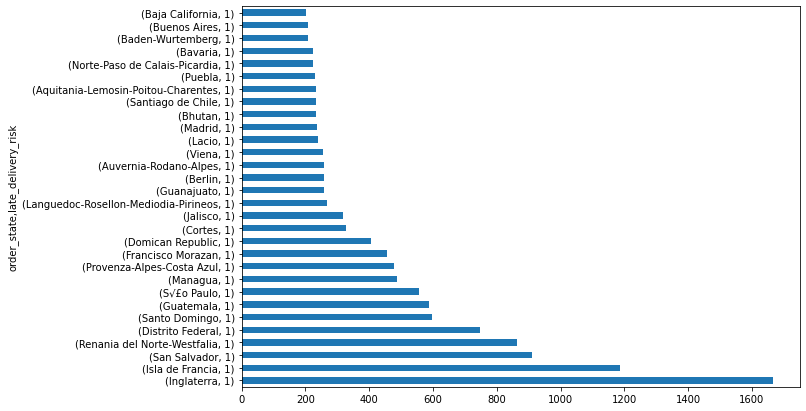

In [ ]:
df_laterisk.groupby('order_state')['late_delivery_risk'].value_counts().sort_values(ascending=False).head(30).plot(kind='barh',figsize=(10,7))

In [ ]:
df_location_all_2 = df.copy()

In [ ]:
df_location_all_2 = df_location_all_2.groupby('order_state',as_index=False).agg(total_of_order=('order_id','count'))
df_location_all_2

order_state  total_of_order
0            Abruzos              27
1               Aceh               3
2               Acre              20
3           Adamaoua               1
4            Adamawa               3
..               ...             ...
725         Zhejiang              38
726         Zhytomyr              20
727            Zulia              83
728           Zurich              57
729  √östi nad Labem              10

[730 rows x 2 columns]

In [ ]:
df_location_2 = df.copy()
df_location_2 = df_location_2[
  df_location_2['late_delivery_risk'].isin([1])]
df_location_2['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_location_2= df_location_2.groupby('order_state',as_index=False).agg(number_of_order_risk=('order_id','count'))
df_location_2

order_state  number_of_order_risk
0            Abruzos                    18
1               Aceh                     2
2               Acre                    12
3           Adamaoua                     1
4            Adamawa                     3
..               ...                   ...
651         Zhejiang                    17
652         Zhytomyr                     7
653            Zulia                    31
654           Zurich                    29
655  √östi nad Labem                    10

[656 rows x 2 columns]

In [ ]:
df_location_merge_2 = df_location_all_2.merge(df_location_2, how='left', on='order_state')
df_location_merge_2['%']=round((df_location_merge_2['number_of_order_risk'] / df_location_merge_2['total_of_order']) *100 ,2)
df_location_merge_2['percentage'] = pd.Series(df_location_merge_2['%'], dtype='string') + '%'
df_location_merge_2.sort_values('%')

order_state  total_of_order  number_of_order_risk      % percentage
530       Peravia              26                   1.0   3.85      3.85%
124      Buskerud              11                   1.0   9.09      9.09%
465      Misiones              18                   2.0  11.11     11.11%
235       Escania              17                   2.0  11.76     11.76%
661      Ternopil               8                   1.0  12.50      12.5%
..            ...             ...                   ...    ...        ...
649  Tadla-Azilal               2                   NaN    NaN       <NA>
667        Tiflis               1                   NaN    NaN       <NA>
672       Tochigi               2                   NaN    NaN       <NA>
679  Tsnh Csn Ths               1                   NaN    NaN       <NA>
715        Yibuti               2                   NaN    NaN       <NA>

[730 rows x 5 columns]

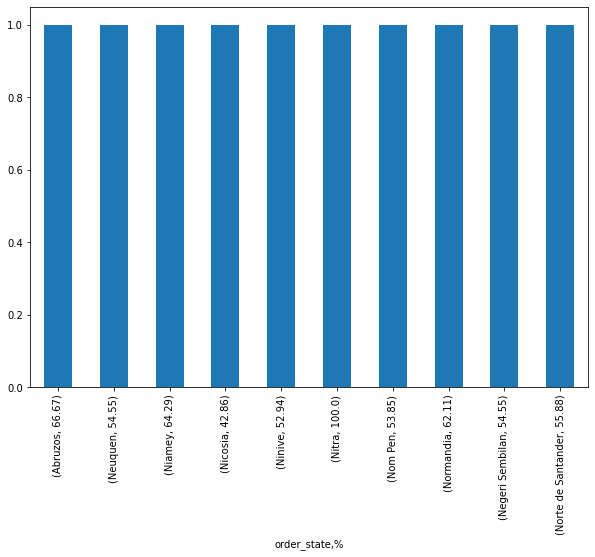

In [ ]:
df_location_merge_2.groupby('order_state')['%'].value_counts().sort_values(ascending=True).head(10).plot(kind='bar',figsize=(10,7))

Group by order country

In [ ]:
df_laterisk.groupby('order_country')['late_delivery_risk'].value_counts().sort_values(ascending=False)

order_country  late_delivery_risk
Bhutan         1                     3698
Francia        1                     3358
Alemania       1                     2463
Brasil         1                     2204
Reino Unido    1                     1784
                                     ... 
Myanmar        1                        1
Turkmenistan   1                        1
Taiwan         1                        1
Congo          1                        1
Macedonia      1                        1
Name: late_delivery_risk, Length: 123, dtype: int64

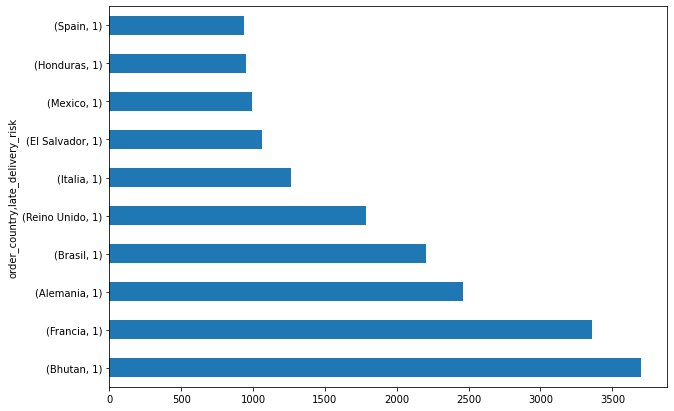

In [ ]:
df_laterisk.groupby('order_country')['late_delivery_risk'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(10,7))

In [ ]:
df_location_all_3 = df.copy()

In [ ]:
df_location_all_3 = df_location_all_3.groupby('order_country',as_index=False).agg(total_of_order=('order_id','count'))
df_location_all_3

order_country  total_of_order
0      Afganistan              27
1         Albania              10
2        Alemania            4422
3          Angola              24
4         Argelia              97
..            ...             ...
124       Vietnam             120
125         Yemen              16
126        Yibuti               2
127        Zambia              32
128      Zimbabue              12

[129 rows x 2 columns]

In [ ]:
df_location_3 = df.copy()
df_location_3 = df_location_3[
  df_location_3['late_delivery_risk'].isin([1])]
df_location_3['late_delivery_risk'].value_counts()

1    30158
Name: late_delivery_risk, dtype: int64

In [ ]:
df_location_3= df_location_3.groupby('order_country',as_index=False).agg(number_of_order_risk=('order_id','count'))
df_location_3

order_country  number_of_order_risk
0      Afganistan                    15
1         Albania                    10
2        Alemania                  2463
3          Angola                    11
4         Argelia                    52
..            ...                   ...
118     Venezuela                   252
119       Vietnam                    67
120         Yemen                     3
121        Zambia                    17
122      Zimbabue                     5

[123 rows x 2 columns]

In [ ]:
df_location_merge_3 = df_location_3.merge(df_location_all_3, how='left', on='order_country')
df_location_merge_3['%']=round((df_location_merge_3['number_of_order_risk'] / df_location_merge_3['total_of_order']) *100 ,2)
df_location_merge_3['percentage'] = pd.Series(df_location_merge_3['%'], dtype='string') + '%'
df_location_merge_3.sort_values('%')

order_country  number_of_order_risk  total_of_order       % percentage
120         Yemen                     3              16   18.75     18.75%
90       Paraguay                     7              36   19.44     19.44%
26          Congo                     1               4   25.00      25.0%
20       Cameroon                     2               8   25.00      25.0%
117    Uzbekistan                    10              31   32.26     32.26%
..            ...                   ...             ...     ...        ...
108        Taiwan                     1               1  100.00     100.0%
38     Eslovaquia                     2               2  100.00     100.0%
101       Somalia                     8               8  100.00     100.0%
115        Uganda                     6               6  100.00     100.0%
67           Laos                     2               2  100.00     100.0%

[123 rows x 5 columns]

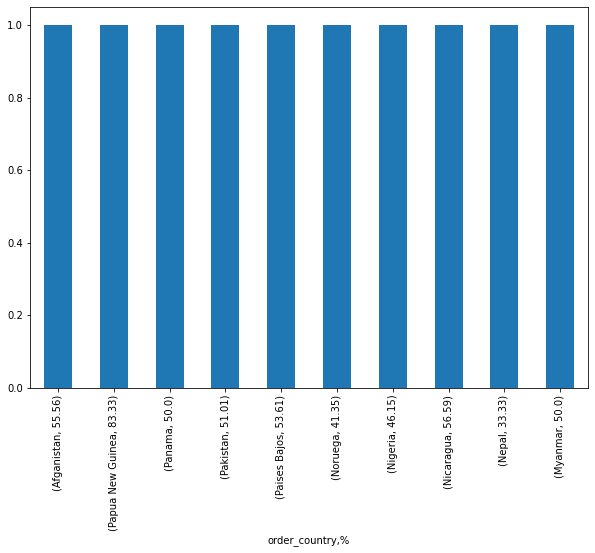

In [ ]:
df_location_merge_3.groupby('order_country')['%'].value_counts().sort_values(ascending=True).head(10).plot(kind='bar',figsize=(10,7))

###**9. What correlation does order's region & product category have towards late delivery?**

In [ ]:
dummy_order_region= pd.get_dummies(df['order_region'])
dummy_order_region.head(5)

Canada  Caribbean  Central Africa  Central America  Central Asia  \
0       0          0               0                0             0   
1       0          0               0                0             0   
2       0          0               0                0             0   
3       0          0               0                0             0   
4       0          0               0                0             0   

   East Africa  Eastern Asia  Eastern Europe  North Africa  Northern Europe  \
0            0             0               0             0                0   
1            0             0               0             0                0   
2            0             0               0             0                0   
3            0             0               0             0                0   
4            0             0               0             0                1   

   Oceania  South America  South Asia  Southeast Asia  Southern Africa  \
0        0              0           0               0                0   
1        0              0           0               0                0   
2        0              0           0               0                0   
3        0              0           0               0                0   
4        0              0           0               0                0   

   Southern Europe  West Africa  West Asia  Western Europe  
0                0            0          0               1  
1                0            0          0               1  
2                0            0          0               1  
3                0            0          0               1  
4                0            0          0               0

In [ ]:
dummy_delivery_status_1 = dummy_delivery_status[['Late delivery']]

In [ ]:
num_region= pd.concat([dummy_order_region, dummy_delivery_status_1], axis =1)

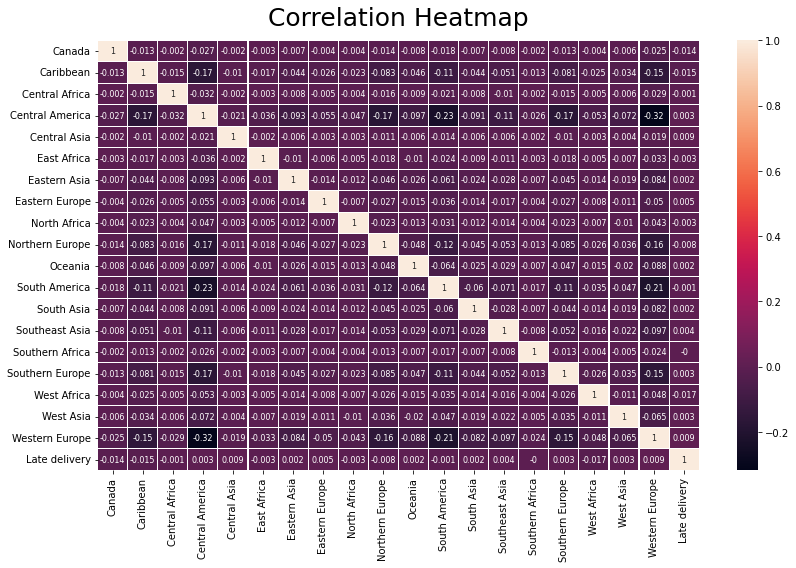

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(num_region.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

In [ ]:
dummy_product_category= pd.get_dummies(df['category_name'])
dummy_product_category.head(5)

Accessories  As Seen on  TV!  Baby   Baseball & Softball  Basketball  \
0            0                0      0                    0           0   
1            0                0      0                    0           0   
2            0                0      0                    0           0   
3            0                0      0                    0           0   
4            0                0      0                    0           0   

   Books   Boxing & MMA  CDs   Cameras   Camping & Hiking  ...  \
0       0             0     0         0                 0  ...   
1       0             0     0         0                 0  ...   
2       0             0     0         0                 0  ...   
3       0             0     0         0                 0  ...   
4       0             0     0         0                 0  ...   

   Sporting Goods  Strength Training  Tennis & Racquet  Toys  Trade-In  \
0               0                  0                 0     0         0   
1               0                  0                 0     0         0   
2               0                  0                 0     0         0   
3               0                  0                 0     0         0   
4               0                  0                 0     0         0   

   Video Games  Water Sports  Women's Apparel  Women's Clothing  \
0            0             0                0                 0   
1            0             0                0                 0   
2            0             0                0                 0   
3            0             0                0                 0   
4            0             0                0                 0   

   Women's Golf Clubs  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 50 columns]

In [ ]:
num_category= pd.concat([dummy_product_category, dummy_delivery_status_1], axis =1)

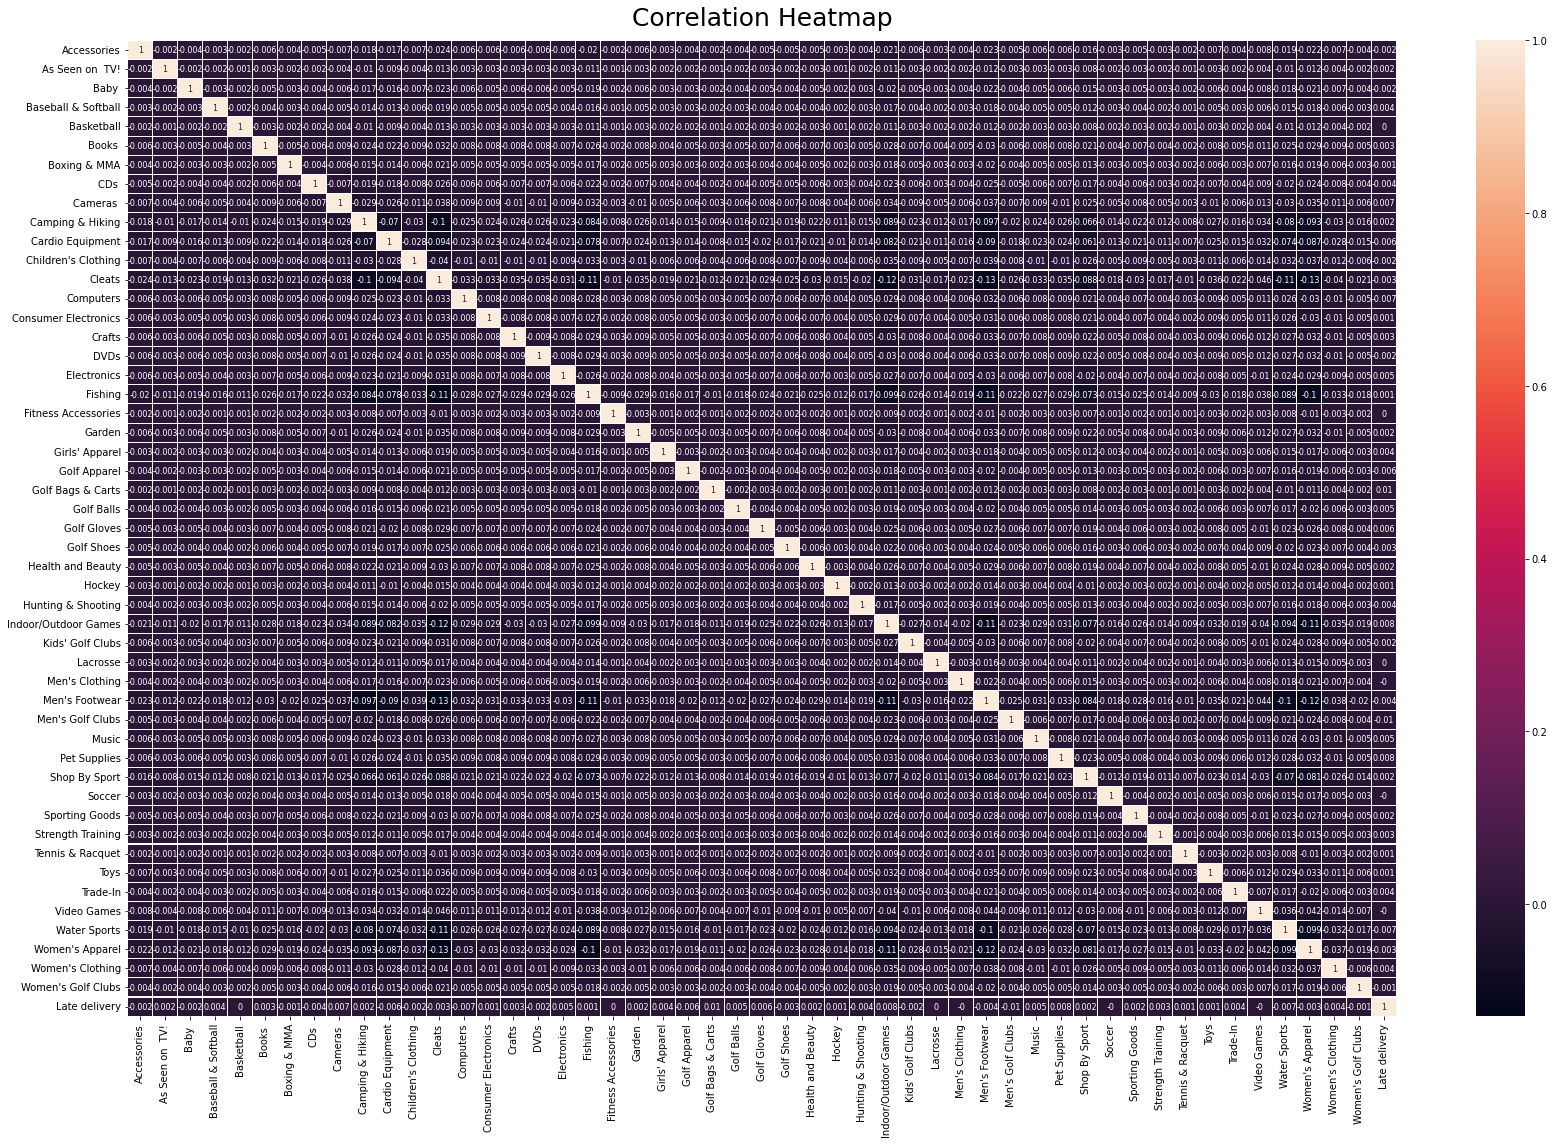

In [ ]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(round(num_category.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

###**10. What correlation does shipping mode and shipping days have towards late delivery?**

In [ ]:
dummy_shipping_mode= pd.get_dummies(df['shipping_mode'])
dummy_shipping_mode.head(5)

First Class  Same Day  Second Class  Standard Class
0            0         0             1               0
1            0         0             1               0
2            0         0             1               0
3            0         0             1               0
4            0         0             1               0

In [ ]:
num_shipping_mode= pd.concat([dummy_shipping_mode, dummy_delivery_status_1], axis =1)

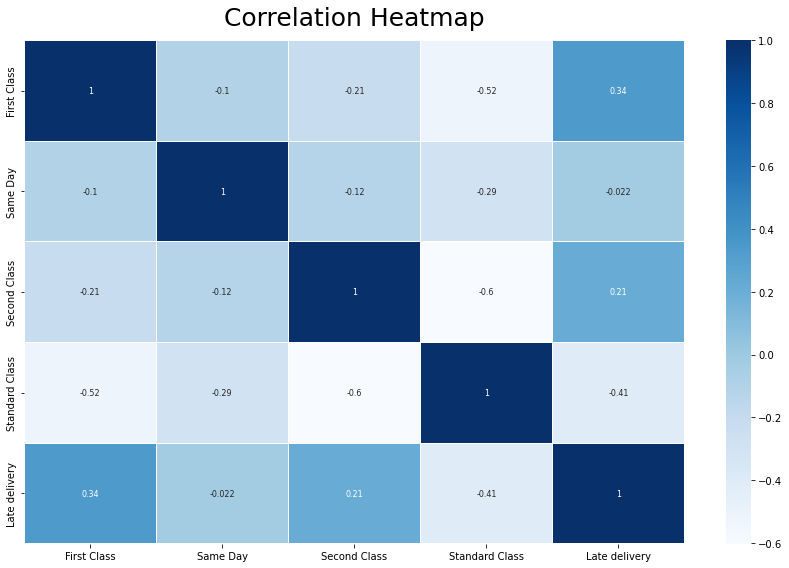

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(num_shipping_mode.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8}, cmap="Blues")
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

In [ ]:
num_region_shipping_mode= pd.concat([dummy_order_region, dummy_shipping_mode], axis =1)

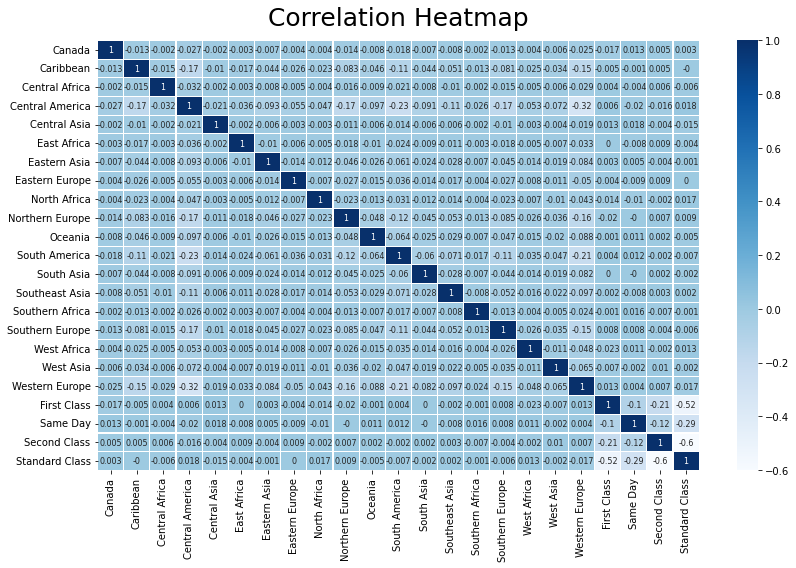

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(num_region_shipping_mode.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8}, cmap="Blues")
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

In [ ]:
shipment_days = df[['shipment_days']]

In [ ]:
dummy_shipment_days= pd.get_dummies(df['shipment_days'])
dummy_shipment_days.head(5)

-4  -3  -2  -1   0   1   2
0   0   0   0   1   0   0   0
1   0   0   1   0   0   0   0
2   1   0   0   0   0   0   0
3   0   0   1   0   0   0   0
4   1   0   0   0   0   0   0

In [ ]:
num_shipment_days= pd.concat([dummy_shipment_days, dummy_delivery_status_1], axis =1)
num_shipment_days.head(5)

-4  -3  -2  -1  0  1  2  Late delivery
0   0   0   0   1  0  0  0              1
1   0   0   1   0  0  0  0              1
2   1   0   0   0  0  0  0              1
3   0   0   1   0  0  0  0              1
4   1   0   0   0  0  0  0              1

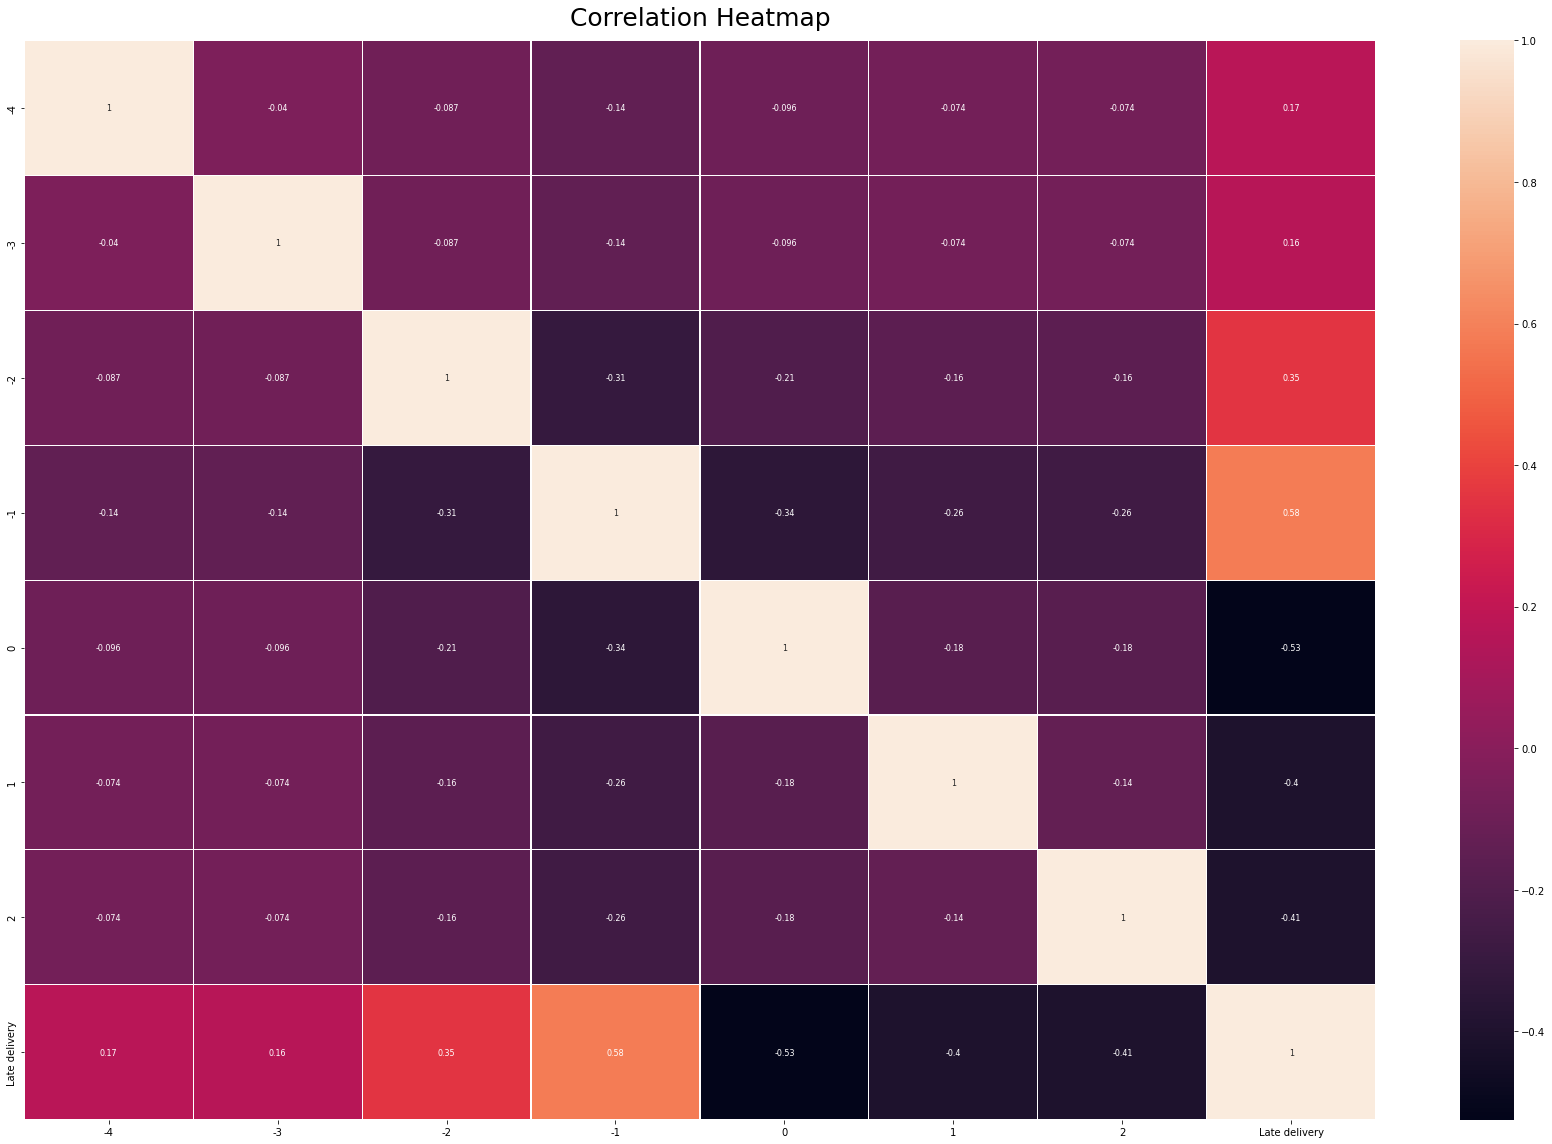

In [ ]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(round(num_shipment_days.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

###**11. What correlation does late delivery have towards profit?**

In [ ]:
profit_order= df.copy()
profit_order['month_year']=profit_order['order_date'].dt.strftime('%Y-%m')
profit_order = profit_order.groupby('month_year',as_index=False).agg(total_profit=('benefit_per_order','sum'))
profit_order

month_year  total_profit
0     2017-01     117265.32
1     2017-02      95655.37
2     2017-03     113779.59
3     2017-04     115230.83
4     2017-05     116430.34
5     2017-06     101819.47
6     2017-07     115225.45
7     2017-08     119022.71
8     2017-09     104503.66
9     2017-10     130494.95
10    2017-11      86451.60
11    2017-12      88068.54
12    2018-01      19737.30
13    2018-02       2409.20
14    2018-03       2674.42
15    2018-04       -683.43
16    2018-05       2526.42
17    2018-06       2066.85
18    2018-07        303.66
19    2018-08        910.58
20    2018-09        474.14
21    2018-10        159.23
22    2018-11       1593.62
23    2018-12       1669.90

In [ ]:
configure_plotly_browser_state()
profit_order.iplot(kind='line',x='month_year',y='total_profit', color='gold', 
theme='solar', mode='markers+lines', title='Monthly Profit per order (2017-2018)', text ='total_profit')
plt.show()

In [ ]:
profit_merge = profit_order.merge(df_monthyear_merge_deliv)
profit_merge.head(5)

month_year  total_profit  total_of_deliv  number_of_deliv  %_deliv  \
0    2017-01     117265.32            5066             2768    54.64   
1    2017-02      95655.37            4688             2513    53.60   
2    2017-03     113779.59            5050             2778    55.01   
3    2017-04     115230.83            4843             2611    53.91   
4    2017-05     116430.34            5028             2778    55.25   

  percentage_deliv  
0           54.64%  
1            53.6%  
2           55.01%  
3           53.91%  
4           55.25%

Because the numeric column have different scale, we need to scale it so all numeric feature have same importance

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
num_profit_order=['total_profit','%_deliv']

In [ ]:
scaler = MinMaxScaler()
profit_merge[num_profit_order] = scaler.fit_transform(profit_merge[num_profit_order])
profit_merge

month_year  total_profit  total_of_deliv  number_of_deliv   %_deliv  \
0     2017-01      0.899148            5066             2768  0.439534   
1     2017-02      0.734411            4688             2513  0.389024   
2     2017-03      0.872575            5050             2778  0.457504   
3     2017-04      0.883638            4843             2611  0.404080   
4     2017-05      0.892783            5028             2778  0.469160   
5     2017-06      0.781401            4645             2508  0.407965   
6     2017-07      0.883597            4959             2687  0.417193   
7     2017-08      0.912545            4957             2855  0.583293   
8     2017-09      0.801863            4867             2693  0.473045   
9     2017-10      1.000000            3029             1539  0.253521   
10    2017-11      0.664248            3021             1602  0.361340   
11    2017-12      0.676575            3040             1631  0.391452   
12    2018-01      0.155671            1369              765  0.499757   
13    2018-02      0.023576              69               35  0.249150   
14    2018-03      0.025598              68               40  0.642545   
15    2018-04      0.000000              69               44  0.882953   
16    2018-05      0.024469              68               31  0.000000   
17    2018-06      0.020966              69               39  0.530840   
18    2018-07      0.007525              68               38  0.499757   
19    2018-08      0.012151              69               40  0.601263   
20    2018-09      0.008824              68               43  0.857212   
21    2018-10      0.006424              69               39  0.530840   
22    2018-11      0.017358              68               45  1.000000   
23    2018-12      0.017940              69               36  0.319573   

   percentage_deliv  
0            54.64%  
1             53.6%  
2            55.01%  
3            53.91%  
4            55.25%  
5            53.99%  
6            54.18%  
7             57.6%  
8            55.33%  
9            50.81%  
10           53.03%  
11           53.65%  
12           55.88%  
13           50.72%  
14           58.82%  
15           63.77%  
16           45.59%  
17           56.52%  
18           55.88%  
19           57.97%  
20           63.24%  
21           56.52%  
22           66.18%  
23           52.17%

In [ ]:
configure_plotly_browser_state()
profit_merge.iplot(kind='line',x='month_year',y=['total_profit','%_deliv'], color=['gold','white'], 
theme='solar', mode='markers+lines', title='Monthly Percentage of Late Delivery & Profit per order (2017-2018)')
plt.show()

Check correlation between provit and late delivery status

In [ ]:
profit_order = df[['benefit_per_order']]

In [ ]:
df3= pd.concat([profit_order, dummy_delivery_status], axis =1)
df3.head(5)

benefit_per_order  Advance shipping  Late delivery  Shipping canceled  \
0              36.16                 0              1                  0   
1            -410.79                 0              1                  0   
2              32.22                 0              1                  0   
3            -254.30                 0              1                  0   
4              16.16                 0              1                  0   

   Shipping on time  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
num_profit_order=['benefit_per_order']

In [ ]:
scaler = MinMaxScaler()
df3[num_profit_order] = scaler.fit_transform(df3[num_profit_order])
df3

benefit_per_order  Advance shipping  Late delivery  Shipping canceled  \
0               0.831178                 0              1                  0   
1               0.745007                 0              1                  0   
2               0.830419                 0              1                  0   
3               0.775178                 0              1                  0   
4               0.827323                 0              1                  0   
...                  ...               ...            ...                ...   
55314           0.838135                 0              0                  1   
55315           0.827350                 0              0                  1   
55316           0.844537                 0              0                  1   
55317           0.801493                 0              0                  1   
55318           0.829129                 0              0                  1   

       Shipping on time  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
55314                 0  
55315                 0  
55316                 0  
55317                 0  
55318                 0  

[55316 rows x 5 columns]

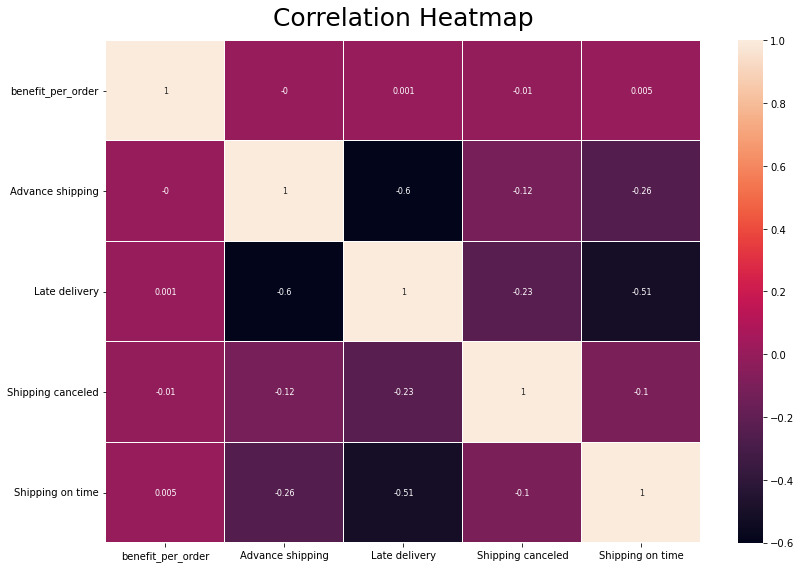

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(df3.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

In [ ]:
df4= pd.concat([profit_order, dummy_shipment_status], axis =1)
df4.head(5)

benefit_per_order  delay  early  on time
0              36.16      1      0        0
1            -410.79      1      0        0
2              32.22      1      0        0
3            -254.30      1      0        0
4              16.16      1      0        0

In [ ]:
scaler = MinMaxScaler()
df4[num_profit_order] = scaler.fit_transform(df4[num_profit_order])
df4.head(5)

benefit_per_order  delay  early  on time
0           0.831178      1      0        0
1           0.745007      1      0        0
2           0.830419      1      0        0
3           0.775178      1      0        0
4           0.827323      1      0        0

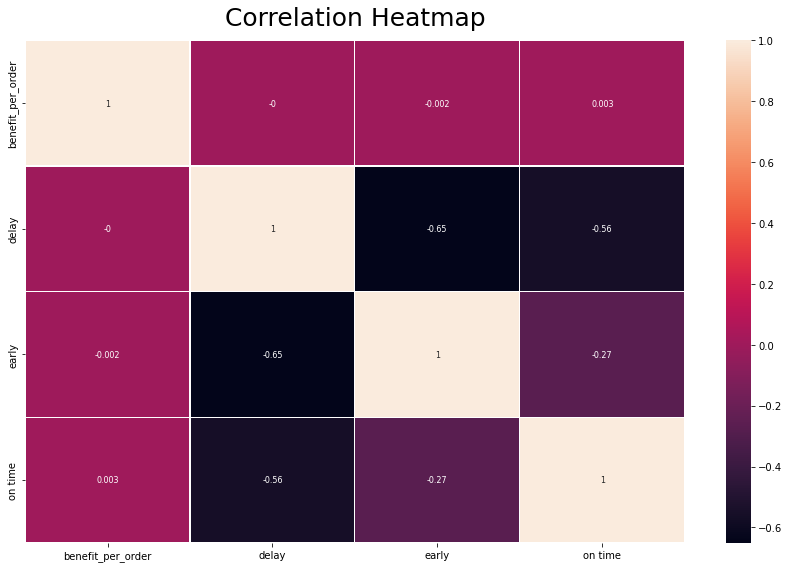

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(round(df4.corr(), 3), annot = True, linewidths=.1, annot_kws={"size": 8})
plt.title('Correlation Heatmap', size= 25, pad=15)
plt.tight_layout()

##**Logistic Regression**

In [ ]:
categorical_column = df[['delivery_status','late_delivery_risk', 'category_name', 'customer_segment','department_name','market','order_country','order_item_quantity','order_region','order_status','shipping_mode','shipment_days','shipment_status','product_name']]

In [ ]:
flr = categorical_column.copy()
dmc = [column for column in flr.columns if flr[column].nunique()<131]
data = pd.get_dummies(flr, columns = dmc, drop_first = True, dtype = 'uint8')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = data.drop('late_delivery_risk_1', axis=1)
y = data.late_delivery_risk_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [ ]:
y_test.value_counts()[0] / y_test.shape[0]

0.4525459475745707

In [ ]:
Log = LogisticRegression()
Log.fit(X_train, y_train)

LogisticRegression()

In [ ]:
Log.score(X_test, y_test)

1.0

In [ ]:
coeff = Log.coef_

In [ ]:
coeff2 = np.array(coeff)
coeff3 = coeff2.flatten().tolist()

In [ ]:
X_train.shape

(38721, 354)

In [ ]:
fi = pd.DataFrame([X_train.columns, coeff3])
fi = fi.T.sort_values(by = 1, ascending = False)[1:10]

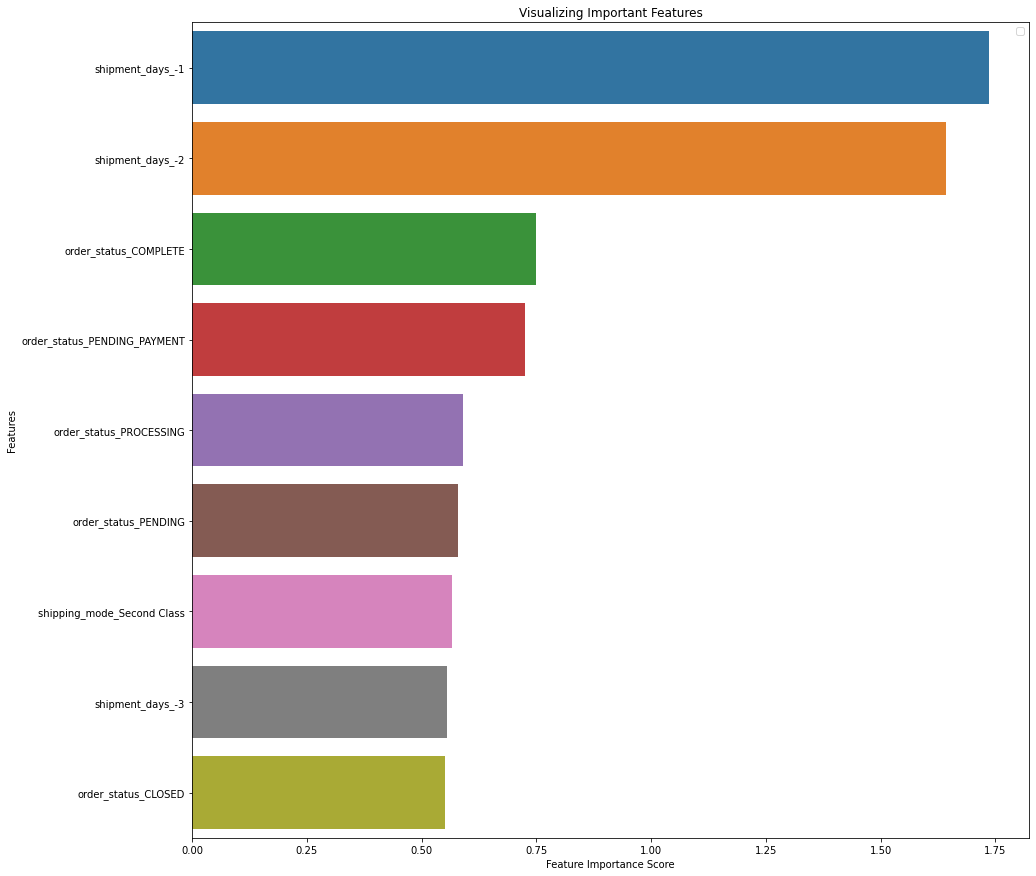

In [ ]:
plt.figure(figsize = (15, 15))
sns.barplot(x = fi[1], y = fi[0])

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

Accuracy Test 

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, ShuffleSplit
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, plot_roc_curve, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
classifiers= []
classifiers.append(KNeighborsClassifier(n_neighbors=1))
classifiers.append(LogisticRegression())
classifiers.append(GaussianNB())
classifiers.append(RandomForestClassifier(max_depth=5))

In [ ]:
accuracy_results_1= []
for a in classifiers:
  accuracy_results_1.append(round(accuracy_score(y_test, a.fit(X_train, y_train).predict(X_test))*100,2))#y_pred))

eval_frame2= pd.DataFrame()
eval_frame2['Model']= ["KNN", "Logistic Regression", "Naive Bayes", "Random Forest"]
eval_frame2['train_test_split']= accuracy_results_1
eval_frame2

Model  train_test_split
0                  KNN             95.96
1  Logistic Regression            100.00
2          Naive Bayes             99.95
3        Random Forest             99.99